**Introduction**

First glance at the dataset. The dataset contains information regarding clients information that was taken during call compain by commercial institution. The target of the campaign was to maximize amount of clients subscribed to a term deposit.
The aim of this report is to investigate trends, relationships of dataset features.

Description of dataset features  
*Independent Variables*

Related to client:   
1 - age (numeric)  
2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
5 - default: has credit in default? (categorical: "no","yes","unknown")  
6 - housing: has housing loan? (categorical: "no","yes","unknown")  
7 - loan: has personal loan? (categorical: "no","yes","unknown")
related with the last contact of the current campaign:  
8 - contact: contact communication type (categorical: "cellular","telephone")  
9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

Related to social and economic context    
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)       
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)
  
*Dependent variable (Target variable)*    
21 - y - has the client subscribed a term deposit? (binary: "yes","no")

**Loading dataset , first glance at dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import zscore
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [ ]:
df = pd.read_csv('./bank-additional-full.csv', delimiter=";")
df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   
5  telephone   may         mon  ...         1    999         0  nonexistent   
6  telephone   may         mon  ...         1    999         0  nonexistent   
7  telephone   may         mon  ...         1    999         0  nonexistent   
8  telephone   may         mon  ...         1    999         0  nonexistent   
9  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  
5          1.1          93.994          -36.4      4.857       5191.0  no  
6          1.1          93.994          -36.4      4.857       5191.0  no  
7          1.1          93.994          -36.4      4.857       5191.0  no  
8          1.1          93.994          -36.4      4.857       5191.0  no  
9          1.1          93.994          -36.4      4.857       5191.0  no  

[10 rows x 21 columns]

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Seems like there is no missing values in dataframe. But if look at unique values for each column, we will see that some features include values like: "nonexistent" and "unknown".

In [ ]:
def unique():
  unique_values = df.apply(pd.Series.unique)

  for column in unique_values.index:
      print(f"Unique vals in'{column}':")
      print(unique_values[column])
      print("\n")
unique()

Unique vals in'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Unique vals in'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Unique vals in'marital':
['married' 'single' 'divorced' 'unknown']


Unique vals in'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Unique vals in'default':
['no' 'unknown' 'yes']


Unique vals in'housing':
['no' 'yes' 'unknown']


Unique vals in'loan':
['no' 'yes' 'unknown']


Unique vals in'contact':
['telephone' 'cellular']


Unique vals in'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Unique vals in'day_of_week':
['mon' 'tue' 'wed' 'thu' 'fri']


Uni

We need to replace values "unknown", "nonexistent" with Nan, to see how much missing values are in dataframe

In [ ]:
df.replace({"nonexistent": np.nan, "unknown": np.nan}, inplace=True)
df.isnull().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [ ]:
df['poutcome'].value_counts(dropna=False, normalize=True) * 100

poutcome
NaN        86.343110
failure    10.323395
success     3.333495
Name: proportion, dtype: float64

We can notice that around 86% of values for feature "poutcome" is Nan. This feature if full of missing values. This suggest us that there is no outcome recorded for past marketing campaign for greater part of instnces in dataset. Maybe new campaign was mostly done on new clients that did not participate in previous campaigns.

Significant part of values is missing fot features: default, education. Also relatively small part values is missing for features: marital, job, loan, housing. We need to consider these features when be dealing with missing values, gaps.

We see that variables default, housing, loan, poutcome, y are basically binary. Their values are {"success/failure"} and {"yes/no"}. It would be helpful for analysis to change values of these features with rule: {"success", "yes"} -> 1 and ("failure", "no"} -> 0.

In [ ]:
df[['default', 'housing', 'loan', 'y']] = df[['default', 'housing', 'loan', 'y']].replace({"no": 0, "yes": 1})
df['poutcome'] = df['poutcome'].replace({'failure': 0, 'success': 1})

<ipython-input-14-79055b7f8bb9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['default', 'housing', 'loan', 'y']] = df[['default', 'housing', 'loan', 'y']].replace({"no": 0, "yes": 1})
<ipython-input-14-79055b7f8bb9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['poutcome'] = df['poutcome'].replace({'failure': 0, 'success': 1})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
unique()

Unique vals in'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Unique vals in'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']


Unique vals in'marital':
['married' 'single' 'divorced' nan]


Unique vals in'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']


Unique vals in'default':
[ 0. nan  1.]


Unique vals in'housing':
[ 0.  1. nan]


Unique vals in'loan':
[ 0.  1. nan]


Unique vals in'contact':
['telephone' 'cellular']


Unique vals in'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Unique vals in'day_of_week':
['mon' 'tue' 'wed' 'thu' 'fri']


Unique vals in'duration':
[ 261  149  226 ... 124

**Handling missing values**  
Let's fill in missing values in the columns that have them. These columns are: job, marital, education, default, housing, loan, and poutcome.

For the job, marital, and education features, we will use the mode filling strategy. I have choosen this strategy as proportion of missing values for these variables is very low and they are cateorical. So after filling in missign values with this strategy the structure of these variables will not change greatly.  
For features housing, loan (categorical, binary features) we can apply the same strategy. Though percent of missing values for these feature is slightly higher than for: job, marital, education. But we can compute that this percent is around 2.4%. So after applying such a strategy, the structure of column will not be very affected too.  
I will use these features for filling missing values decribed in next paragraph, because as was already noted only small proportion of them were missing. They can be still be very valuable for imputing.

For features poutcome and default will be more appropriate to use specific fitting model that finds suitable values to impute. It is due to the big proportion of missing values in these features, and it is better to not impute all of them with constant value, such approach would not preserve the structure of the feature. Obviously, the feature "y" was not used during this process , so to not introduce artificial relationship between imputed features and y.

In [ ]:
# job, marital, education, housing, loan features
def fill_missing_with_mode(df, columns):
    for column in columns:
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)

columns_to_fill = ['job', 'marital', 'education', 'loan', 'housing']
fill_missing_with_mode(df, columns_to_fill)

<ipython-input-17-4e4e3c598b63>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [ ]:
# default, poutcome features
from sklearn.impute import KNNImputer
impute_columns = [
    'default', 'poutcome', 'job', 'marital', 'education', 'loan', 'housing', 'age', 'contact', 'month', 'day_of_week', 'duration',
    'campaign', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

df_impute = df[impute_columns].copy()

df_impute['job'] = df_impute['job'].astype('category').cat.codes
df_impute['marital'] = df_impute['marital'].astype('category').cat.codes
df_impute['education'] = df_impute['education'].astype('category').cat.codes
df_impute['contact'] = df_impute['contact'].astype('category').cat.codes
df_impute['month'] = df_impute['month'].astype('category').cat.codes
df_impute['day_of_week'] = df_impute['day_of_week'].astype('category').cat.codes


imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df_impute), columns=impute_columns)

df_imputed['default'] = df_imputed['default'].round()
df_imputed['poutcome'] = df_imputed['poutcome'].round()

df.update(df_imputed[['default', 'poutcome']])

**Univariate analysis**

In [ ]:
df.describe(include='all').T

count unique                top   freq         mean  \
age             41188.0    NaN                NaN    NaN     40.02406   
job               41188     11             admin.  10752          NaN   
marital           41188      3            married  25008          NaN   
education         41188      7  university.degree  13899          NaN   
default         41188.0    NaN                NaN    NaN     0.000073   
housing         41188.0    NaN                NaN    NaN     0.547878   
loan            41188.0    NaN                NaN    NaN     0.151695   
contact           41188      2           cellular  26144          NaN   
month             41188     10                may  13769          NaN   
day_of_week       41188      5                thu   8623          NaN   
duration        41188.0    NaN                NaN    NaN    258.28501   
campaign        41188.0    NaN                NaN    NaN     2.567593   
pdays           41188.0    NaN                NaN    NaN   962.475454   
previous        41188.0    NaN                NaN    NaN     0.172963   
poutcome        41188.0    NaN                NaN    NaN     0.033335   
emp.var.rate    41188.0    NaN                NaN    NaN     0.081886   
cons.price.idx  41188.0    NaN                NaN    NaN    93.575664   
cons.conf.idx   41188.0    NaN                NaN    NaN     -40.5026   
euribor3m       41188.0    NaN                NaN    NaN     3.621291   
nr.employed     41188.0    NaN                NaN    NaN  5167.035911   
y               41188.0    NaN                NaN    NaN     0.112654   

                       std     min     25%     50%     75%     max  
age               10.42125    17.0    32.0    38.0    47.0    98.0  
job                    NaN     NaN     NaN     NaN     NaN     NaN  
marital                NaN     NaN     NaN     NaN     NaN     NaN  
education              NaN     NaN     NaN     NaN     NaN     NaN  
default           0.008534     0.0     0.0     0.0     0.0     1.0  
housing           0.497708     0.0     0.0     1.0     1.0     1.0  
loan              0.358729     0.0     0.0     0.0     0.0     1.0  
contact                NaN     NaN     NaN     NaN     NaN     NaN  
month                  NaN     NaN     NaN     NaN     NaN     NaN  
day_of_week            NaN     NaN     NaN     NaN     NaN     NaN  
duration        259.279249     0.0   102.0   180.0   319.0  4918.0  
campaign          2.770014     1.0     1.0     2.0     3.0    56.0  
pdays           186.910907     0.0   999.0   999.0   999.0   999.0  
previous          0.494901     0.0     0.0     0.0     0.0     7.0  
poutcome          0.179512     0.0     0.0     0.0     0.0     1.0  
emp.var.rate       1.57096    -3.4    -1.8     1.1     1.4     1.4  
cons.price.idx     0.57884  92.201  93.075  93.749  93.994  94.767  
cons.conf.idx     4.628198   -50.8   -42.7   -41.8   -36.4   -26.9  
euribor3m         1.734447   0.634   1.344   4.857   4.961   5.045  
nr.employed      72.251528  4963.6  5099.1  5191.0  5228.1  5228.1  
y                 0.316173     0.0     0.0     0.0     0.0     1.0

Mean age for clients presented in dataset is 40, most of the clients are working as "admin."s, the most frequent education lavel is univeristy degree.
For features: cons.price.idx and nr.employed values did not change drastically throughout dataset (small standart deviation and range of values is around mean).  

In [ ]:
df['default'].value_counts(normalize = True)*100

default
0.0    99.992716
1.0     0.007284
Name: proportion, dtype: float64

We can notice that mean value for feature "default" is around 0, with very small stabndart deviation. It is binary variable. It is clear that almost all values for this variable are 0. Lets look at proportion of all 0 and 1 of this variable. We can see that approximately 99.9 clients did not have credit in default in our dataset. The standart deviation is very small. This feature is not very informative in our dataset.

In [ ]:
percentages = df['pdays'].value_counts(normalize=True) * 100
percentages.get(999)

96.32174419733903

Lets take a closer look at feature "pdays". This feature denotes number of days that passed by after the client was last contacted from a previous campaign. It has critical value: 999, which means that client was not previously contacted at all. The mean for this value is very close to 999 and median is equal to 999. This suggets that most of clients were not contacted. Let's look on how many were contacted and how many were not, in percentages.

We see that indeed almost all clients (approximately 96%) were not contacted previously

In [ ]:
percentages = df['previous'].value_counts(normalize=True) * 100
percentages.get(0)

86.3431096435855

Also we can notice that probably feature "previous" takes most frequent values equal to 0. As its mean and median are close to 0, with small standart deviation. The cell below prooves this. This varibale denotes number of contacts performed before current campaign and for this client. We can conclude that greater part of all clients in dataset were not contacted before this campaign. This also suggests us that most clients in our dataset were new.

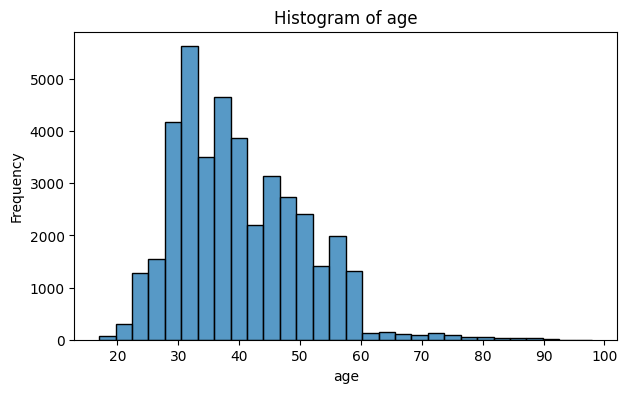

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(df["age"], bins=30)
plt.title('Histogram of age')
plt.ylabel('Frequency')
plt.show()

From histogram of client ages we can notice that there are some ouliers, as most of our client ages are located in range from 29 to 40.

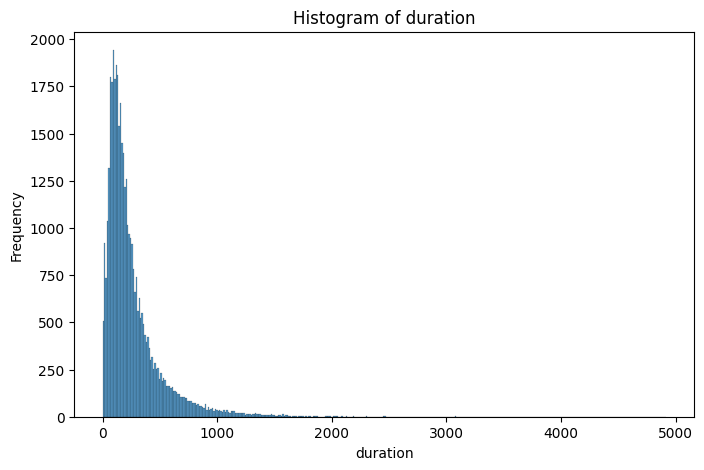

In [ ]:
column = 'duration'
plt.figure(figsize=(8, 5))
sns.histplot(df[column])
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

In [ ]:
(df['duration'] > 1000).sum()

956

Distribution for contionuos variable "duration" suggests that feature contains a lot of outliers of high value. We see that only 956 contact durations exceeded 2000 seconds , such events are very unlikely to happen and can be considered as outliers. Maybe such values were recorded by mistake, maybe the call was not ended properly or indeed maybe such long calls were done only for valuable clients.

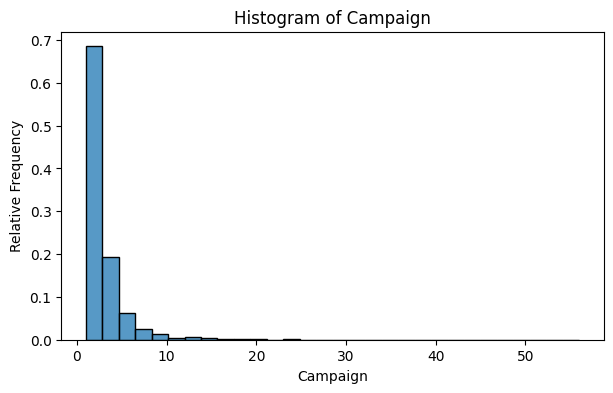

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(df['campaign'], bins=30, stat='probability')
plt.title('Histogram of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Relative Frequency')
plt.show()


From distrbution we see that for all clients presented in dataset during this compain was conducted at least 1 contact. For biggest part of clients were done few contacts during this campaign. For some clients were made more than 10 contacts, which was very rare and unsual, such events can be considered as outliers, as they fall out of usual pattern.

---



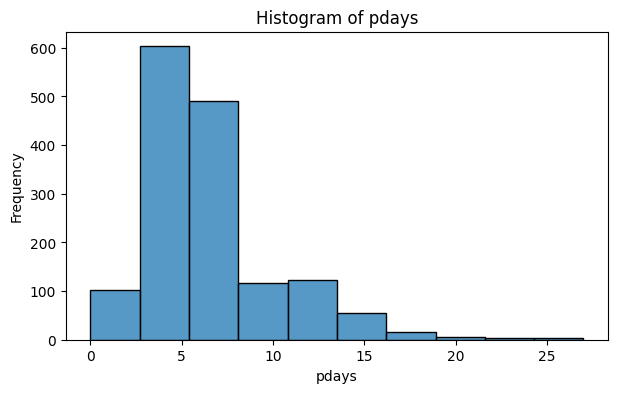

In [ ]:
column = 'pdays'
plt.figure(figsize=(7, 4))
sns.histplot(df[df[column] != 999][column], bins=10, kde=False)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

The distribution tells us that number of days that passed by after the client was last contacted from a previous campaign is most likely to be in range of a week. It was needed to exclude values for this feature of 999 to see feature distribution of uncritical values.

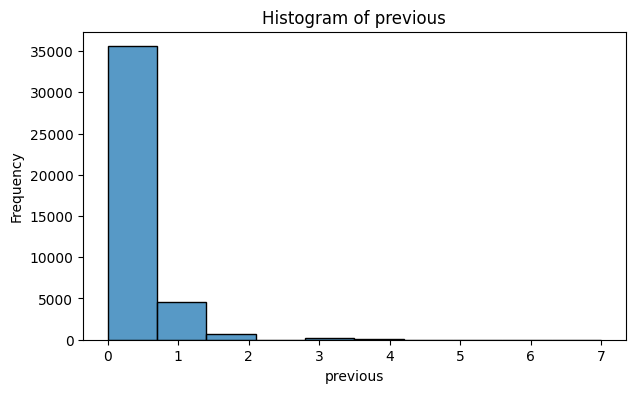

In [ ]:
column = 'previous'
plt.figure(figsize=(7, 4))
sns.histplot(df[df[column] != 999][column], bins=10, kde=False)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

Here we see right skewed distribution with of its most mass located between 0 and 1. Ouliers are present. Most of the values are zeros. This shows the same result as we have seen from descriptive statistics, most of the clients presented in dataset have not been contacted before currecnt recorded campaign, maybe these clients are new.

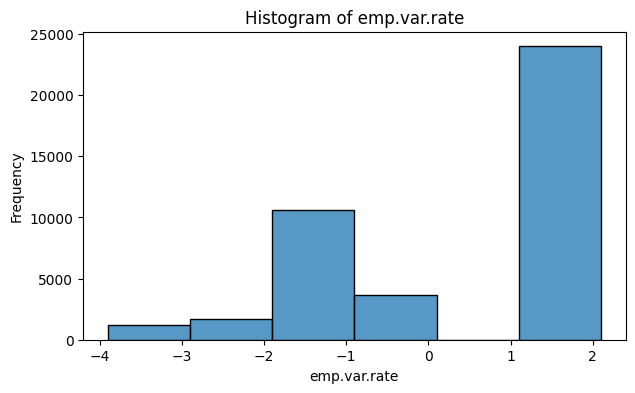

In [ ]:
column = 'emp.var.rate'
plt.figure(figsize=(7, 4))
sns.histplot(df[column], discrete=True, kde=False)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

Left skewed distribution with gap. Most of the mass is located approximately betwee 1 and 2.

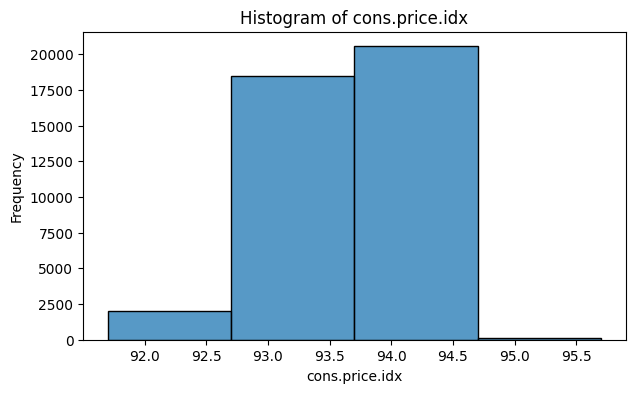

In [ ]:
num_bins = 9
column = 'cons.price.idx'
plt.figure(figsize=(7, 4))
sns.histplot(df[column], discrete=True, kde=False)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

The distribution has no outliers. Values for this feature do not varu much.

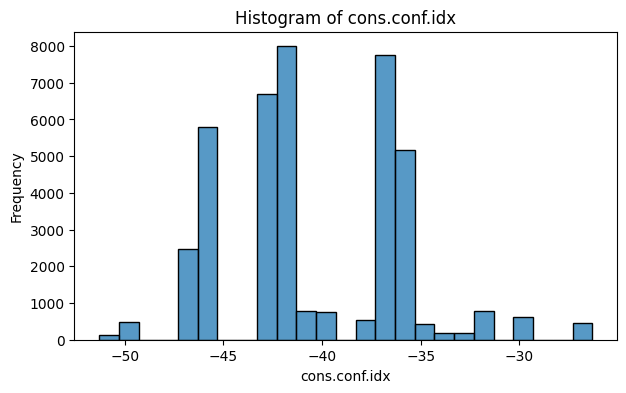

In [ ]:
column = 'cons.conf.idx'
plt.figure(figsize=(7, 4))
sns.histplot(df[column], discrete=True,kde=False)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

Multimode distribution with numerous of gaps. We see two clear peaks in this distribution.

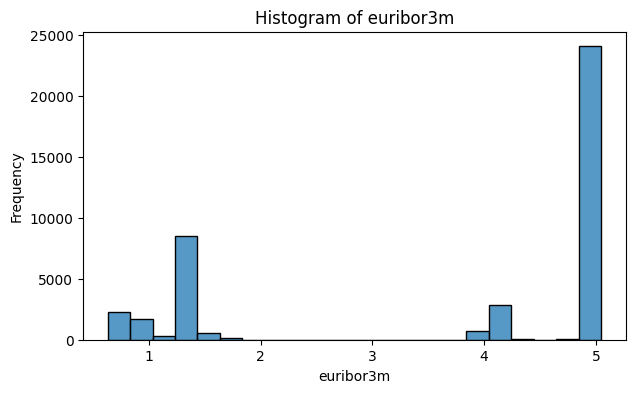

In [ ]:
column = 'euribor3m'
plt.figure(figsize=(7, 4))
sns.histplot(df[column], kde=False)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

The distribution is gapped, most mass is around of value 5, outliers are clearly present, around values [0.3;1.7]

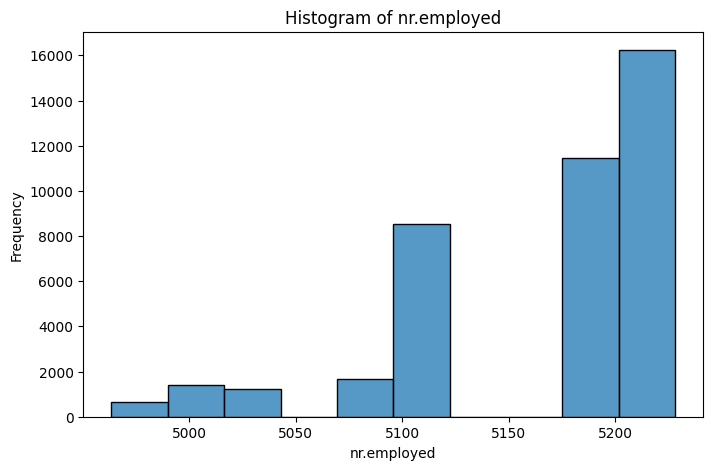

In [ ]:
num_bins = 9
column = 'nr.employed'
plt.figure(figsize=(8, 5))
sns.histplot(df[column], bins=10, kde=False)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

From the distribution we can notice that the number of employees is almost constant all the time and is near of value 5000. Most of the time number of employees was around value 5200.

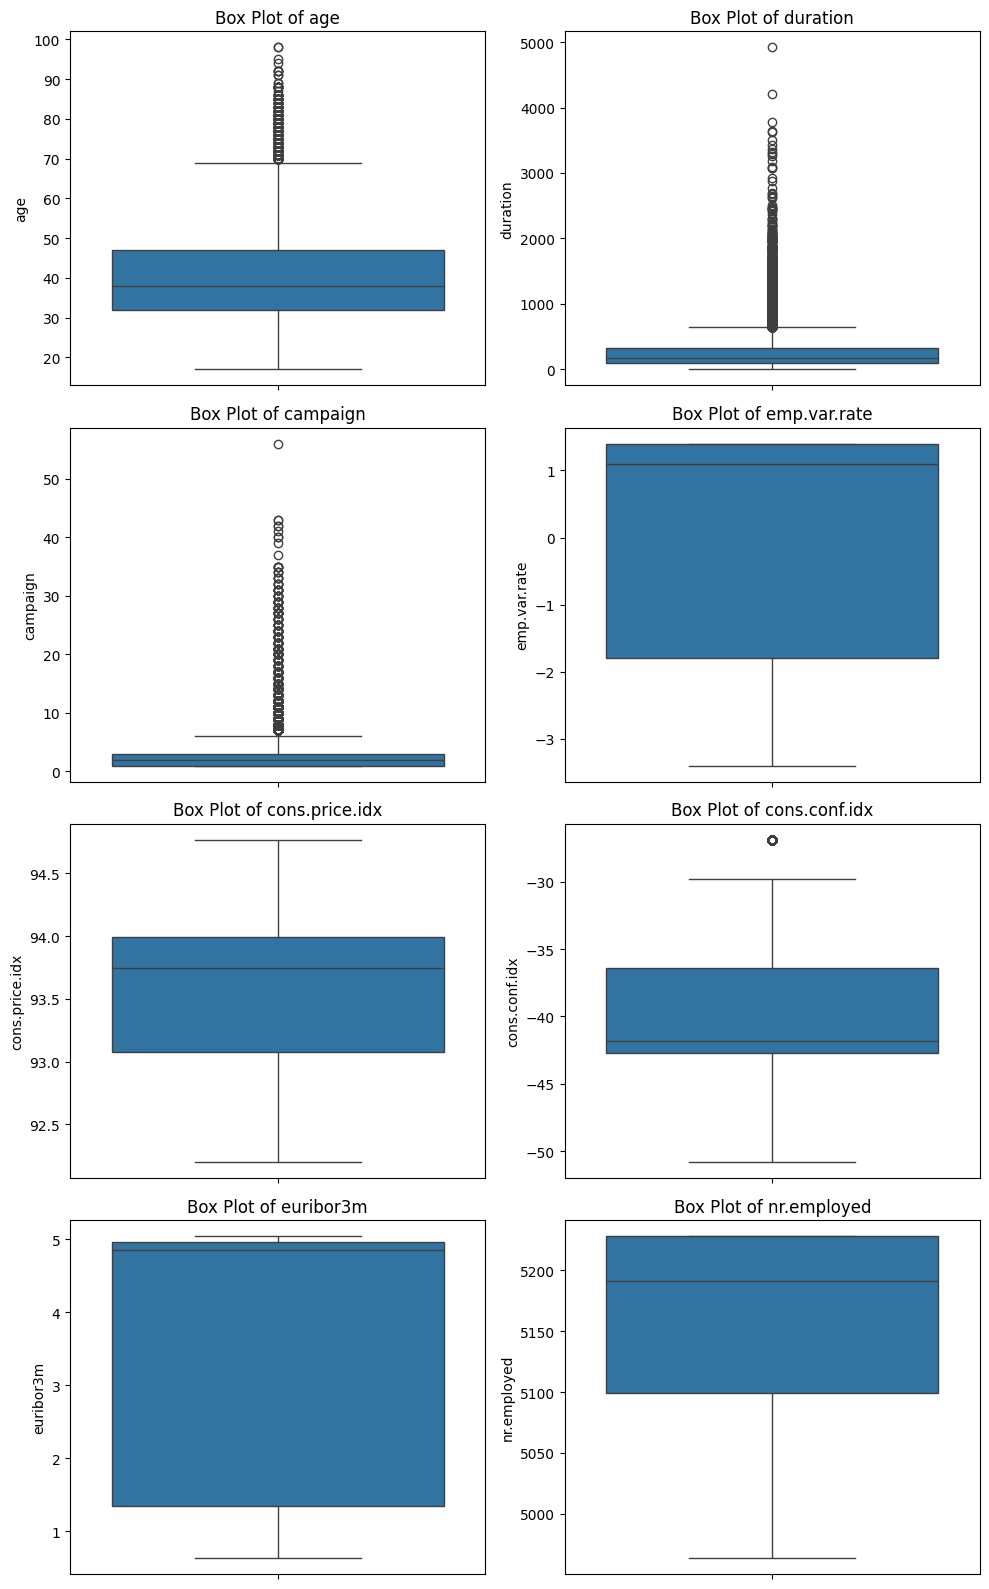

In [ ]:
columns = ['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

num_features = len(columns)
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(5 * num_cols, 4 * num_rows))

for i, feature in enumerate(columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

It seen that features: "age", "duration", "campaign" contain outliers.  
Distribution of features "age", "duration", "campaign" are right skewed. The distribution of varibales: "nr.employed", "emp.var.rate" are left skewed. Boxplots for features "cons.price.idx" and "cons.conf.idx" are almost centered , with little assymetry. We can see that social and economic context attributes : "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed" do not contain outliers. Further we will need to check variables: "age", "duration", "campaign" for containing ouliers and extract them from these features.

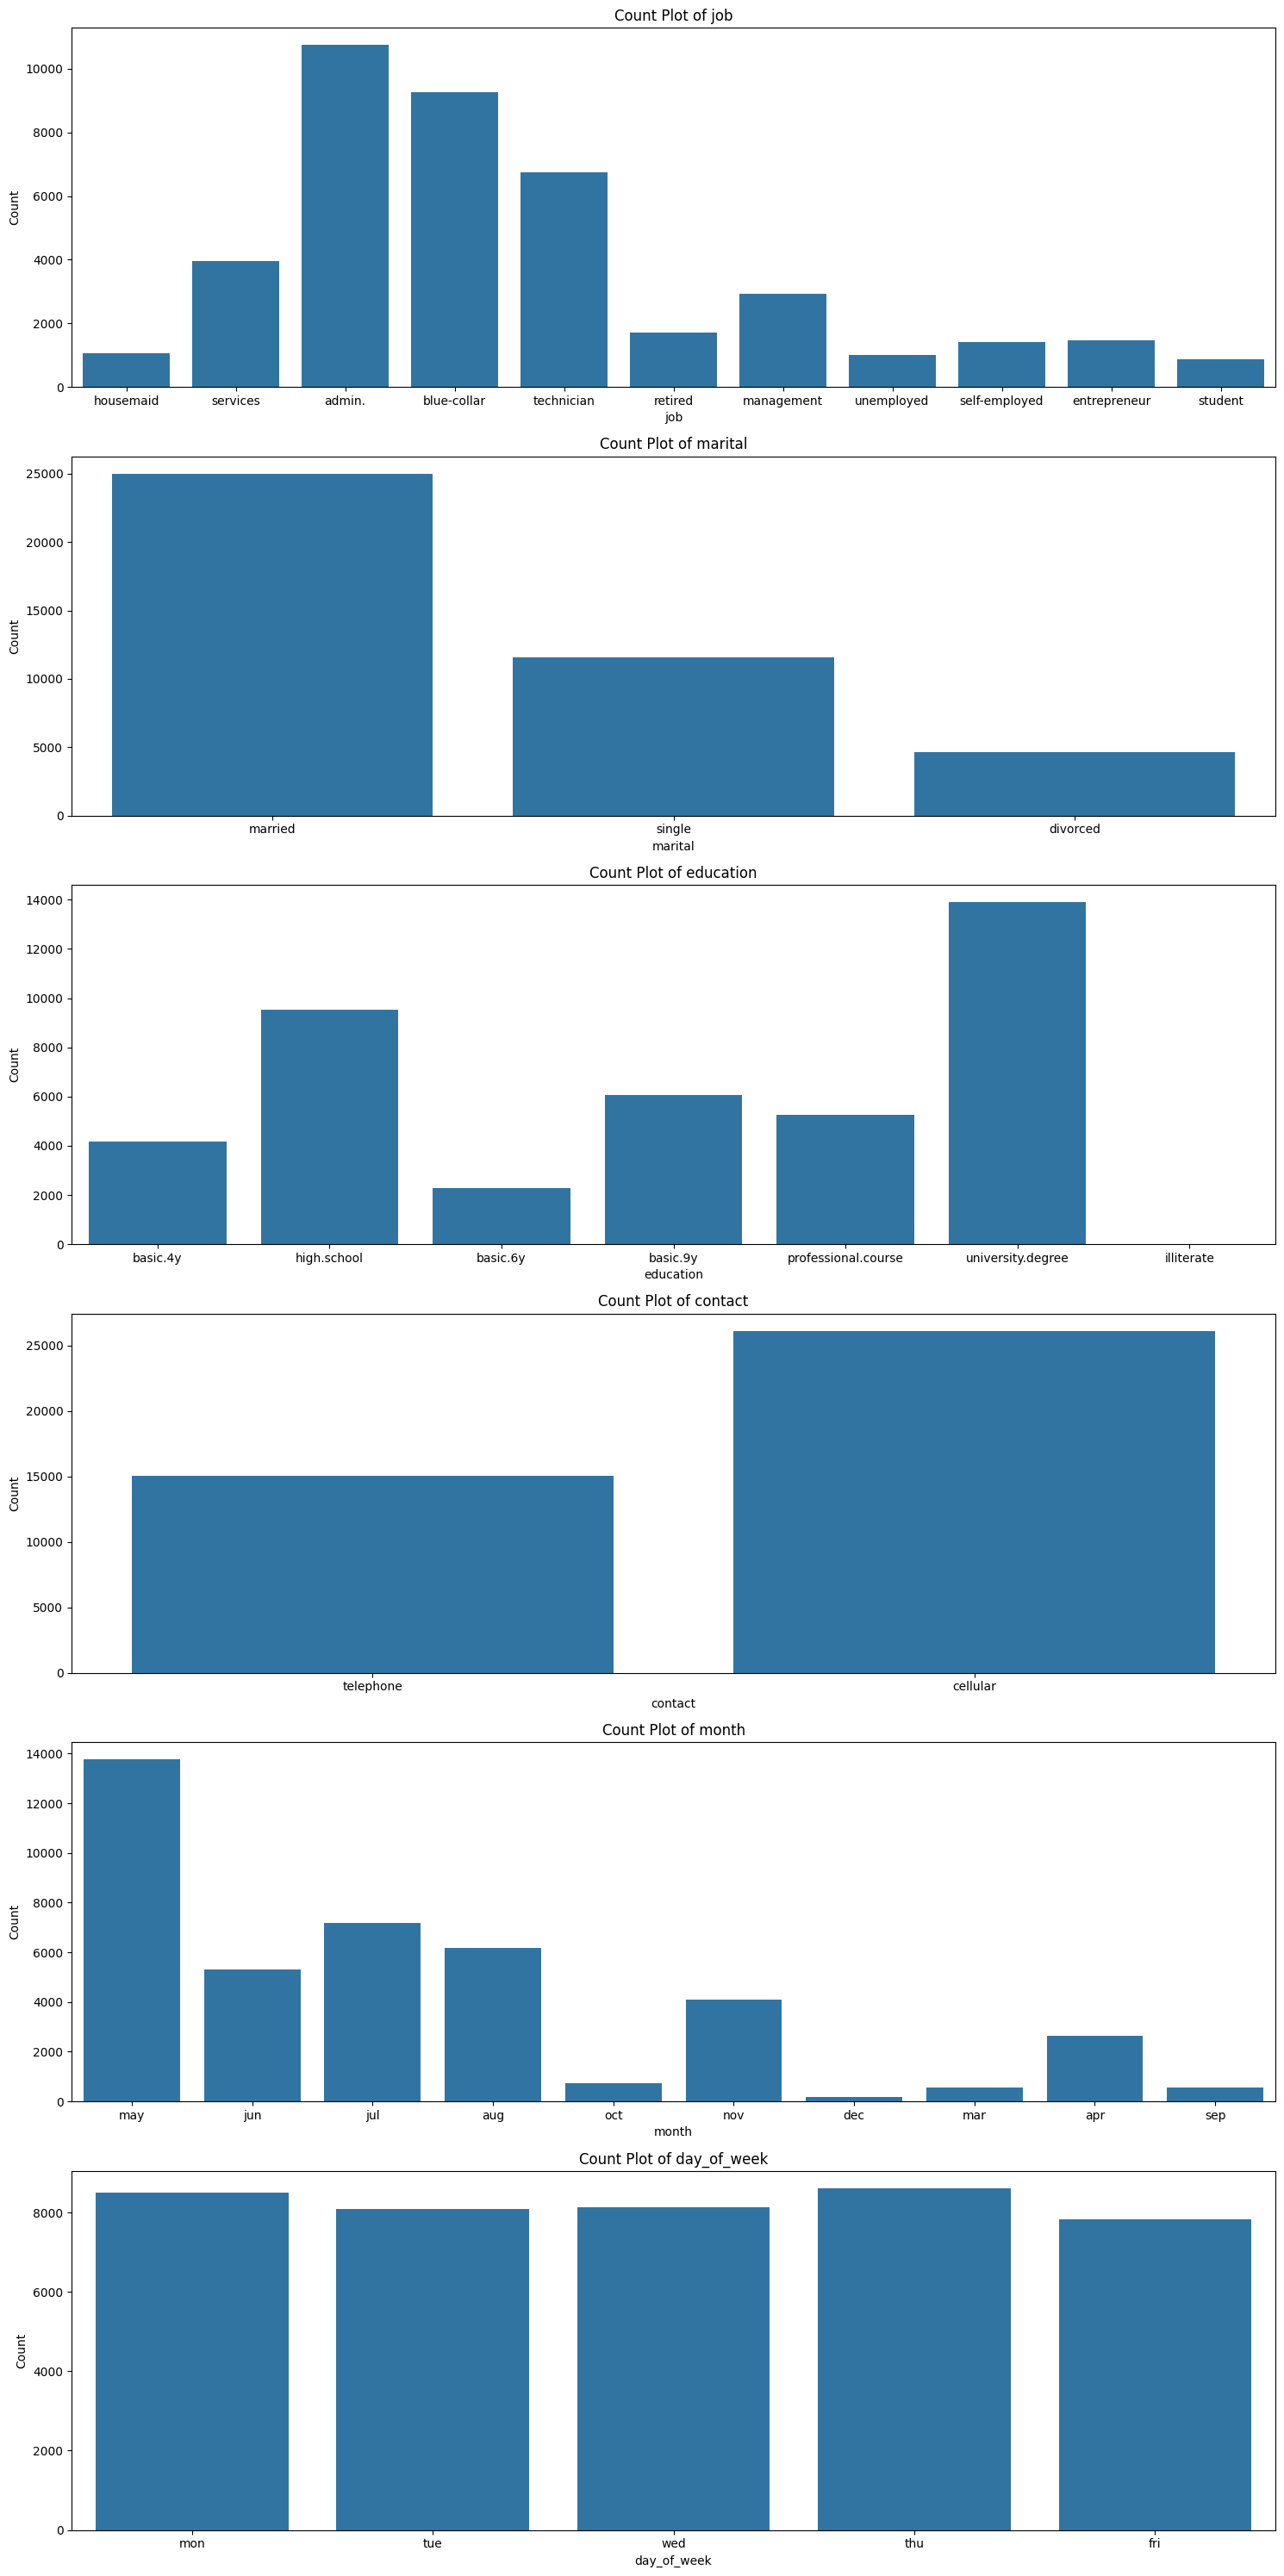

In [ ]:
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week']

plt.figure(figsize=(15, 30))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


We see from plots that most clients in dataset are working as administrators, technicians and blue-collars. Most of clients are married, mostly clients education is - university degree or high school. Also we see that company in most cases contacted them last time via cellular connection. For biggest part of clients in dataset the last contact from company was in May. The smallest amount of last calls to clients was conducted in December. Last contact happens with almost the same probability for every weekday(this suggests us that callcenter is working with the same intensity without regard to a week day)

In [ ]:
df['education'].value_counts()

education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

From plots of categorical variable above we see that number of illiterate clients in dataset is very small.

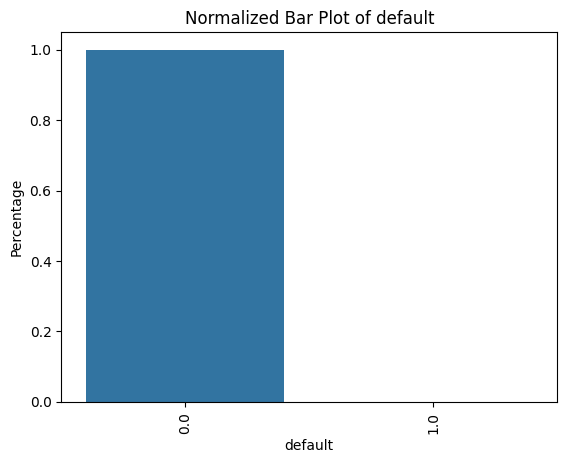

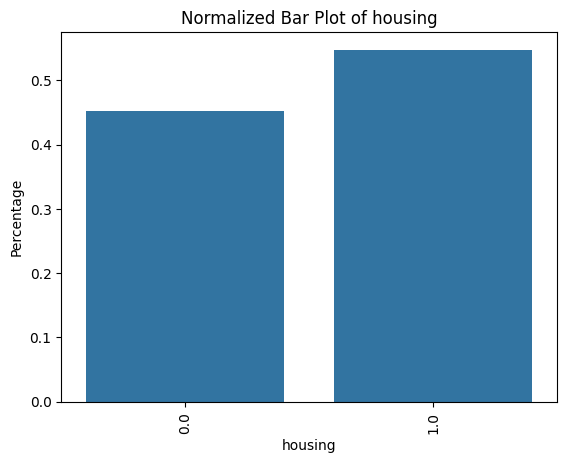

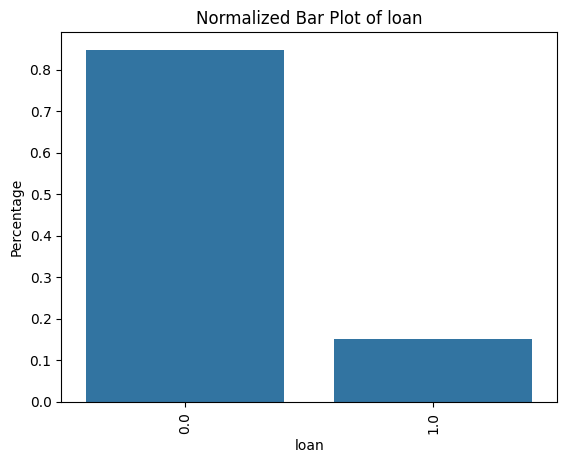

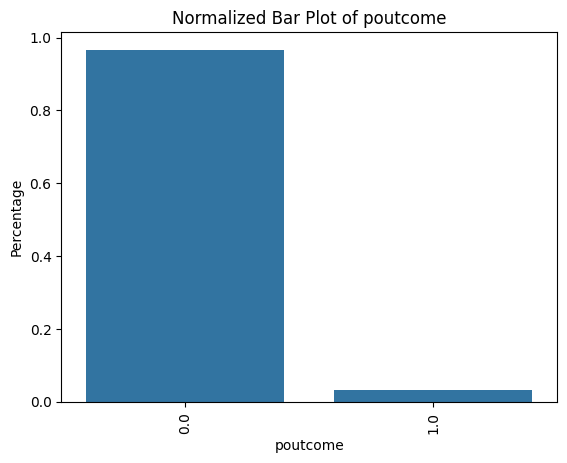

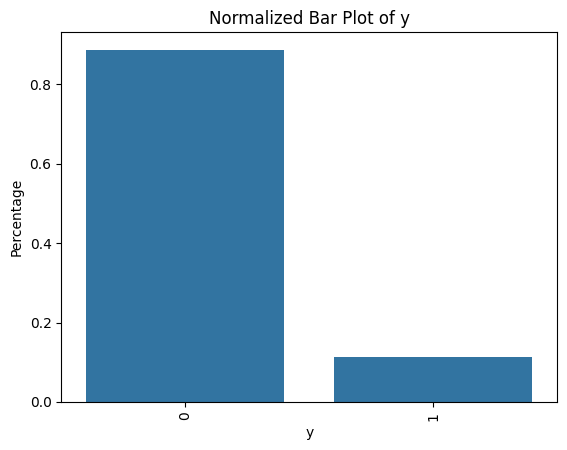

In [ ]:
categorical_features = ['default', 'housing', 'loan', 'poutcome', 'y']


for feature in categorical_features:
    feature_counts = df[feature].value_counts(normalize=True)

    sns.barplot(x=feature_counts.index, y=feature_counts.values)
    plt.xticks(rotation=90)
    plt.title(f'Normalized Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Percentage')

    plt.show()

As was previously noted almost all instances had value of 1 for feature "default". "Housing" feature takes on values 0 and 1 almost with the same ratio, with values of 1 are dominating over values of 0. Greatest part of all instances in dataset has no personal loan which is indicated by variable "loan". Almost 89% of all clients in our dataset did not subsribe a term deposit, which is indicated by target varibale y.

In [ ]:
percentages = df['y'].value_counts(normalize=True) * 100
percentages.get(0)

88.73458288821988

**Multivariate analysis**


<ipython-input-39-968dd7e807b0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_age_group = df.groupby(age_groups).agg(Total=('y', 'size'),Subscribed=('y', 'sum')).reset_index()


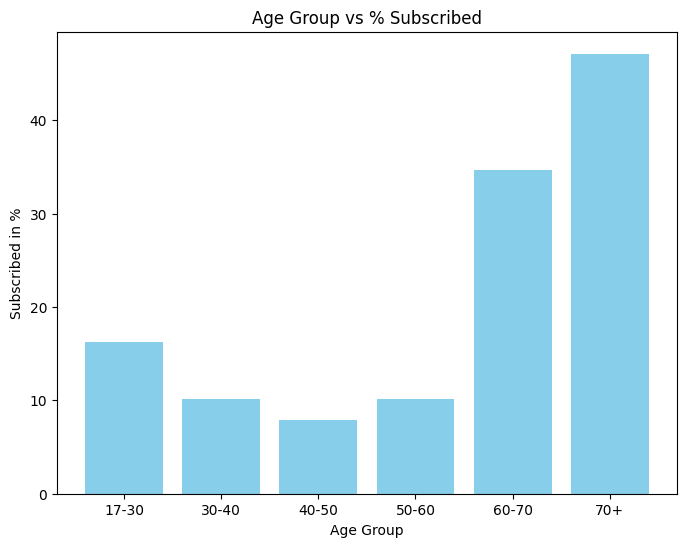

In [ ]:
age_bins = [17, 30, 40, 50, 60, 70, 100]
age_labels = ['17-30', '30-40', '40-50', '50-60', '60-70', '70+']

age_groups = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

data_age_group = df.groupby(age_groups).agg(Total=('y', 'size'),Subscribed=('y', 'sum')).reset_index()

data_age_group['Proportion_Subscribed'] = (data_age_group['Subscribed'] / data_age_group['Total']) * 100

plt.figure(figsize=(8, 6))
plt.bar(data_age_group['age'], data_age_group['Proportion_Subscribed'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Subscribed in %')
plt.title('Age Group vs % Subscribed')
plt.show()

We see that the biggest percentage of subscribed to a term deposit are people of age 60+. We need to pay attention to this age group (instances from this age group could probably be considered as outliers, but this will be investigated later), as it was not very numerous, though has highest perscentage of deposit subscriptions.

In [ ]:
conversation = df['duration'].apply(lambda x: 0 if x == 0 else 1)

temp_df = df.copy()
temp_df['Conversation'] = conversation

data_conversation = temp_df.groupby('Conversation').agg(
    Total=('y', 'size'),
    Subscribed=('y', 'sum'),
    Avg_Campaign=('campaign', 'mean')
).reset_index()

data_conversation['Percentage_y_1'] = (data_conversation['Subscribed'] / data_conversation['Total']) * 100

print("Proportion of y == 1 and Average Campaign for each Conversation group:")
print(data_conversation)

print("\nAll campaign values for clients with Conversation == 0:")
print(temp_df.loc[temp_df['Conversation'] == 0, 'campaign'].tolist())

Proportion of y == 1 and Average Campaign for each Conversation group:
   Conversation  Total  Subscribed  Avg_Campaign  Percentage_y_1
0             0      4           0      4.750000        0.000000
1             1  41184        4640      2.567381       11.266511

All campaign values for clients with Conversation == 0:
[4, 10, 3, 2]


Indeed , only 4 clients had last duration of contact equal to 0, and all of them did not subscribe a term deposit. And wee see that those that had last contact duration of value zero also had on average twice as much contacts during campaign that those who did not have last contact duration equal to zero.

In [ ]:
def plot_percentage_y_equals_1(df, feature):
    data = df.groupby(feature).agg(Total=('y', 'size'),Subscribed=('y', 'sum')).reset_index()

    data['Percentage_y_1'] = (data['Subscribed'] / data['Total']) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(data[feature], data['Percentage_y_1'], color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('y == 1 (%)')
    plt.title(f'y == 1 (%) for values {feature}')
    plt.xticks(rotation=45)
    plt.show()

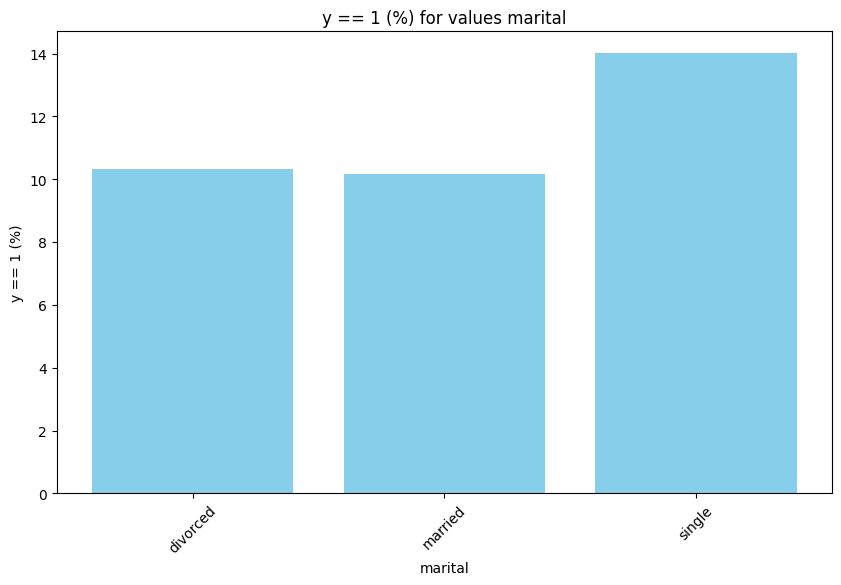

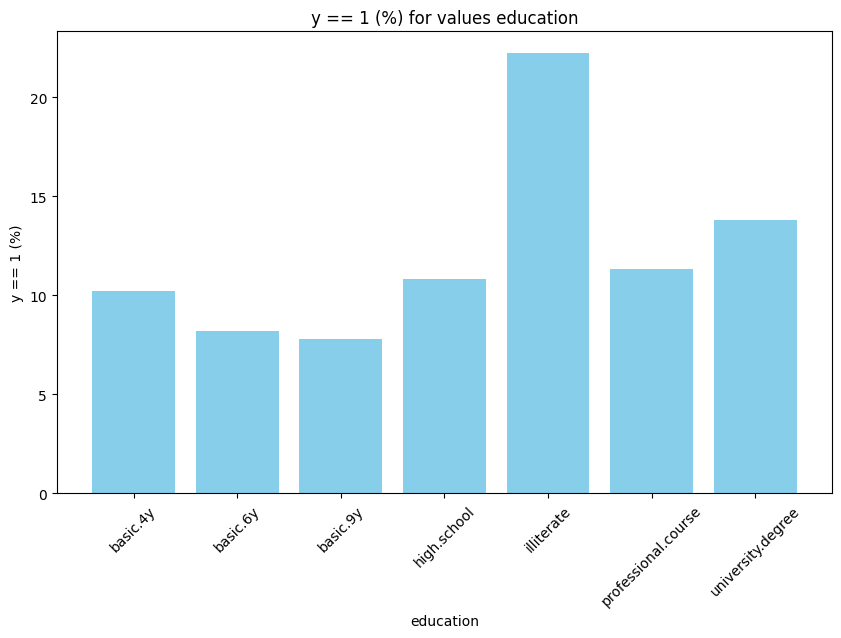

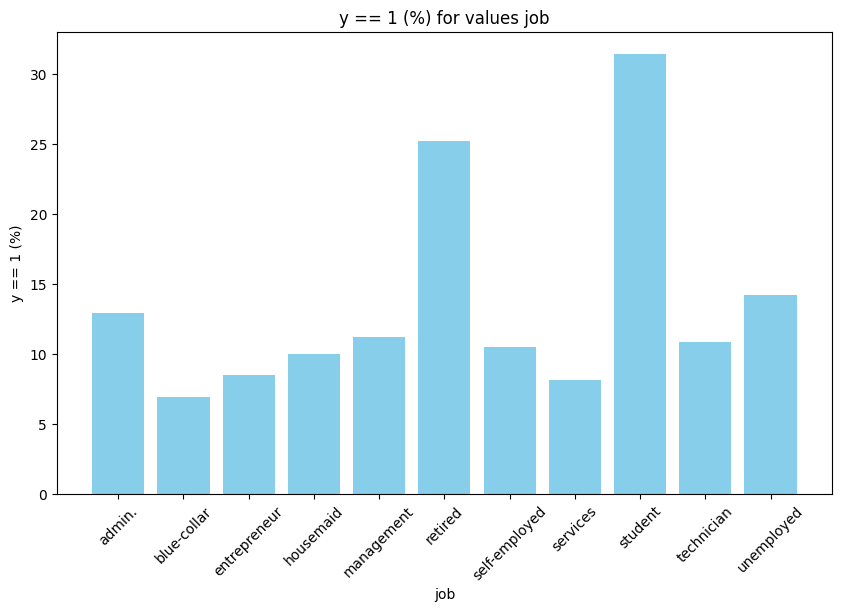

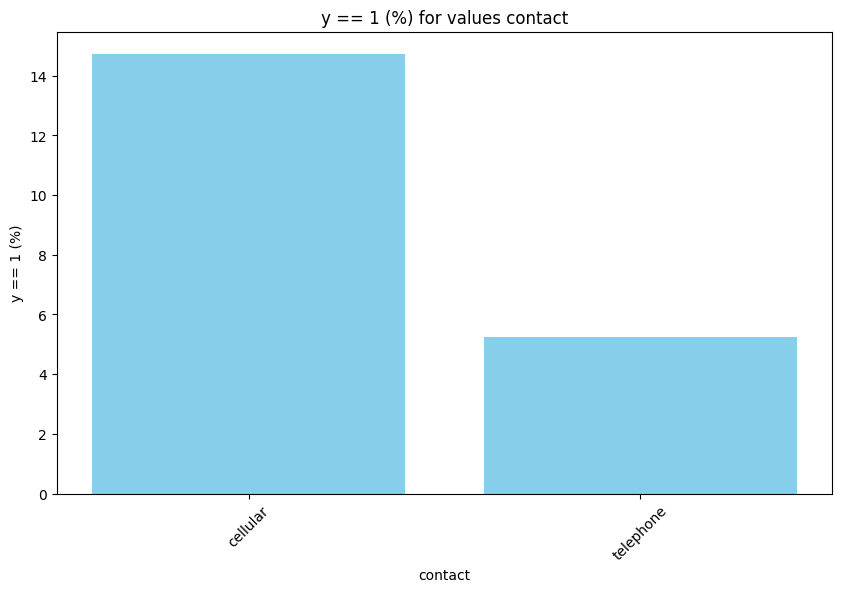

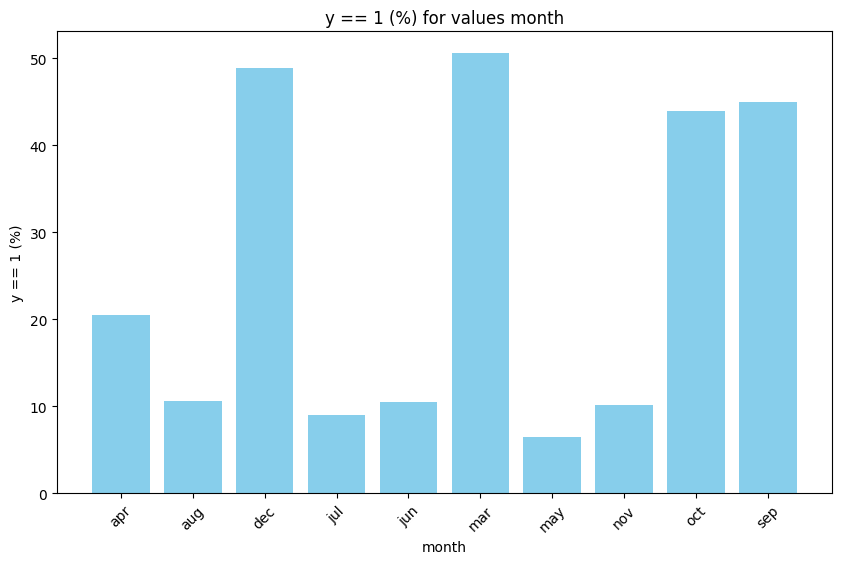

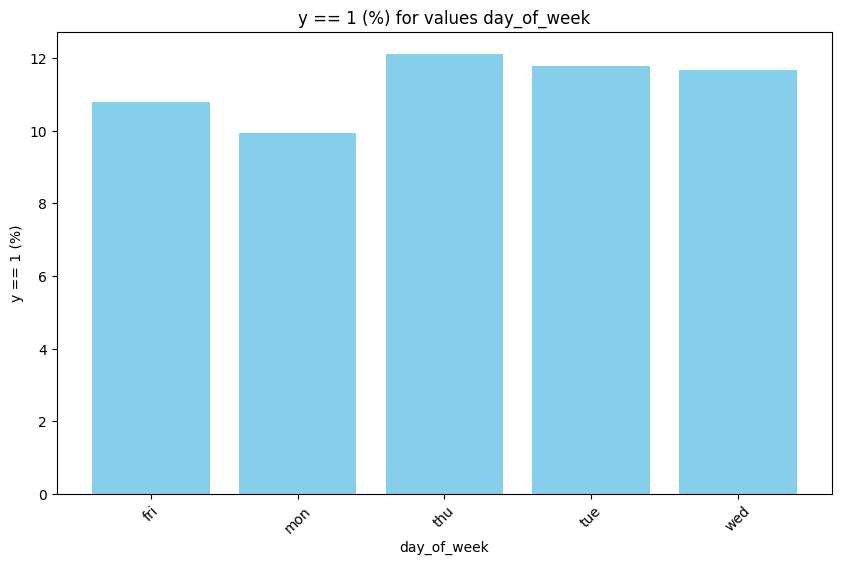

In [ ]:
plot_percentage_y_equals_1(df,'marital'),
plot_percentage_y_equals_1(df,'education'),
plot_percentage_y_equals_1(df,'job'),
plot_percentage_y_equals_1(df,'contact'),
plot_percentage_y_equals_1(df,'month'),
plot_percentage_y_equals_1(df,'day_of_week')

We can observe that:
1. Single people have higher rate of subsription to a term deposit
2. Illiterate people tend to subscribe to a term deposit better than other groups, but as we have seen number of illitarate clients is very small , so it is not very reliable dependency. Clients that have university degree also show relatively high subscription rate, in this case we can be more sure, as we have most of our clients with "education" feature equal to "university"
3. Students and retired clients have tendency to subscribe a term deposit.
4. For contacting via cellular connection number of successful outcomes was significantly higher comparing to contacting via telephone.
5. Clients that were contacted last time in march, december, october, september were more likely to subscribe a term deposit.
6. Percentage of subscribed clients that were contacted last time on tuesday, wednesday, thursday was a little higher than those who were last contacted on monday and friday.

In [ ]:
def plot_percentage_y_equals_1(df, feature):
    data = df.groupby(feature).agg(Total=('y', 'size'),Subscribed=('y', 'sum')).reset_index()

    data['Percentage_y_1'] = (data['Subscribed'] / data['Total']) * 100

    plt.figure(figsize=(8, 6))
    plt.bar(data[feature].astype(str), data['Percentage_y_1'], color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Percentage of y == 1 (%)')
    plt.title(f'Percentage of y == 1 for values of {feature}')
    plt.xticks([0, 1], ['0', '1'])
    plt.show()

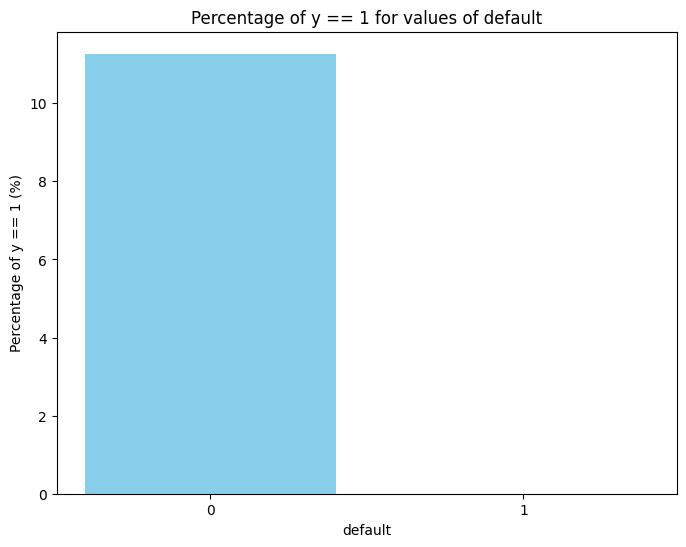

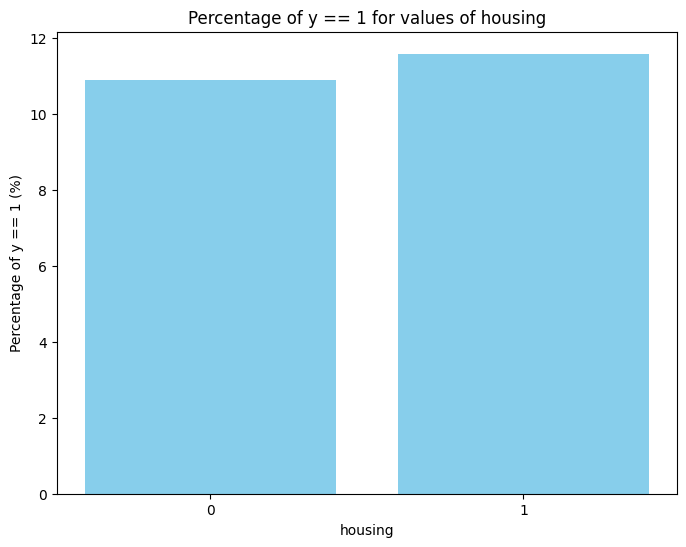

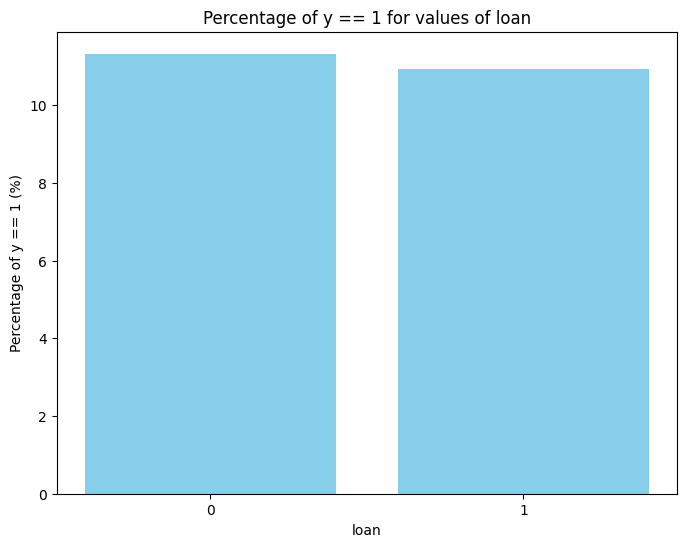

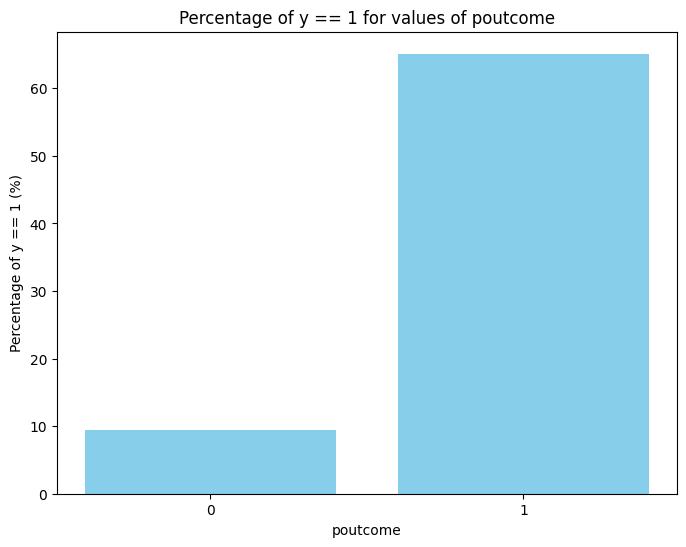

In [ ]:
plot_percentage_y_equals_1(df,'default'),
plot_percentage_y_equals_1(df,'housing'),
plot_percentage_y_equals_1(df,'loan'),
plot_percentage_y_equals_1(df,'poutcome')

We can observe that:
1. Clients that do not have credit in default are much likely to subscribe a term credit.
2. Clients that have housing loan are a little bit more likely to subscribe a term credit.
3. Clients that do not have personal loan are a little bit more likely to subscribe a term credit.
4. Clients that already subscribed a term deposit in last campaign are much likely to subcribe a term deposit in current campaign.

In [ ]:
data_duration = df.groupby('y').agg(Average_Duration=('duration', 'mean')).reset_index()
data_duration

y  Average_Duration
0  0        220.844807
1  1        553.191164

We see that average call duration with successfull outcome (y == 1) was approximately twice longer than average call duration with negative outome(y == 0).

In [ ]:
duration_group = df.groupby(
    df['duration'].apply(lambda x: 'duration < 319' if x < 319 else 'duration >= 319')
).agg(Total=('y', 'size'),Subscribed=('y', 'sum')).reset_index()

duration_group['Percentage_y_1'] = (duration_group['Subscribed'] / duration_group['Total']) * 100

print(duration_group)

          duration  Total  Subscribed  Percentage_y_1
0   duration < 319  30856        1634        5.295567
1  duration >= 319  10332        3006       29.094077


We see that if last contact duration is bigger 319 seconds (which is equal to third quartile for feature duration), then the positive outcome (subscription) happens much likely. This also suggests that ouliers for feature duration are important in our dataset as they have correlation with target varibale y.

In [ ]:
campaign_groups = df['campaign'].apply(lambda x: 'campaign <= 2' if x <= 2 else 'campaign > 2')

data_campaign_group = df.groupby(campaign_groups).agg(
    Total=('y', 'size'),
    Subscribed=('y', 'sum')
).reset_index()

data_campaign_group['Percentage_y_1'] = (data_campaign_group['Subscribed'] / data_campaign_group['Total']) * 100

print(data_campaign_group)


        campaign  Total  Subscribed  Percentage_y_1
0  campaign <= 2  28212        3511       12.445059
1   campaign > 2  12976        1129        8.700678


This might suggest us that contacting client more than twice will only reduce the probability of the client subscribing a term deposit.

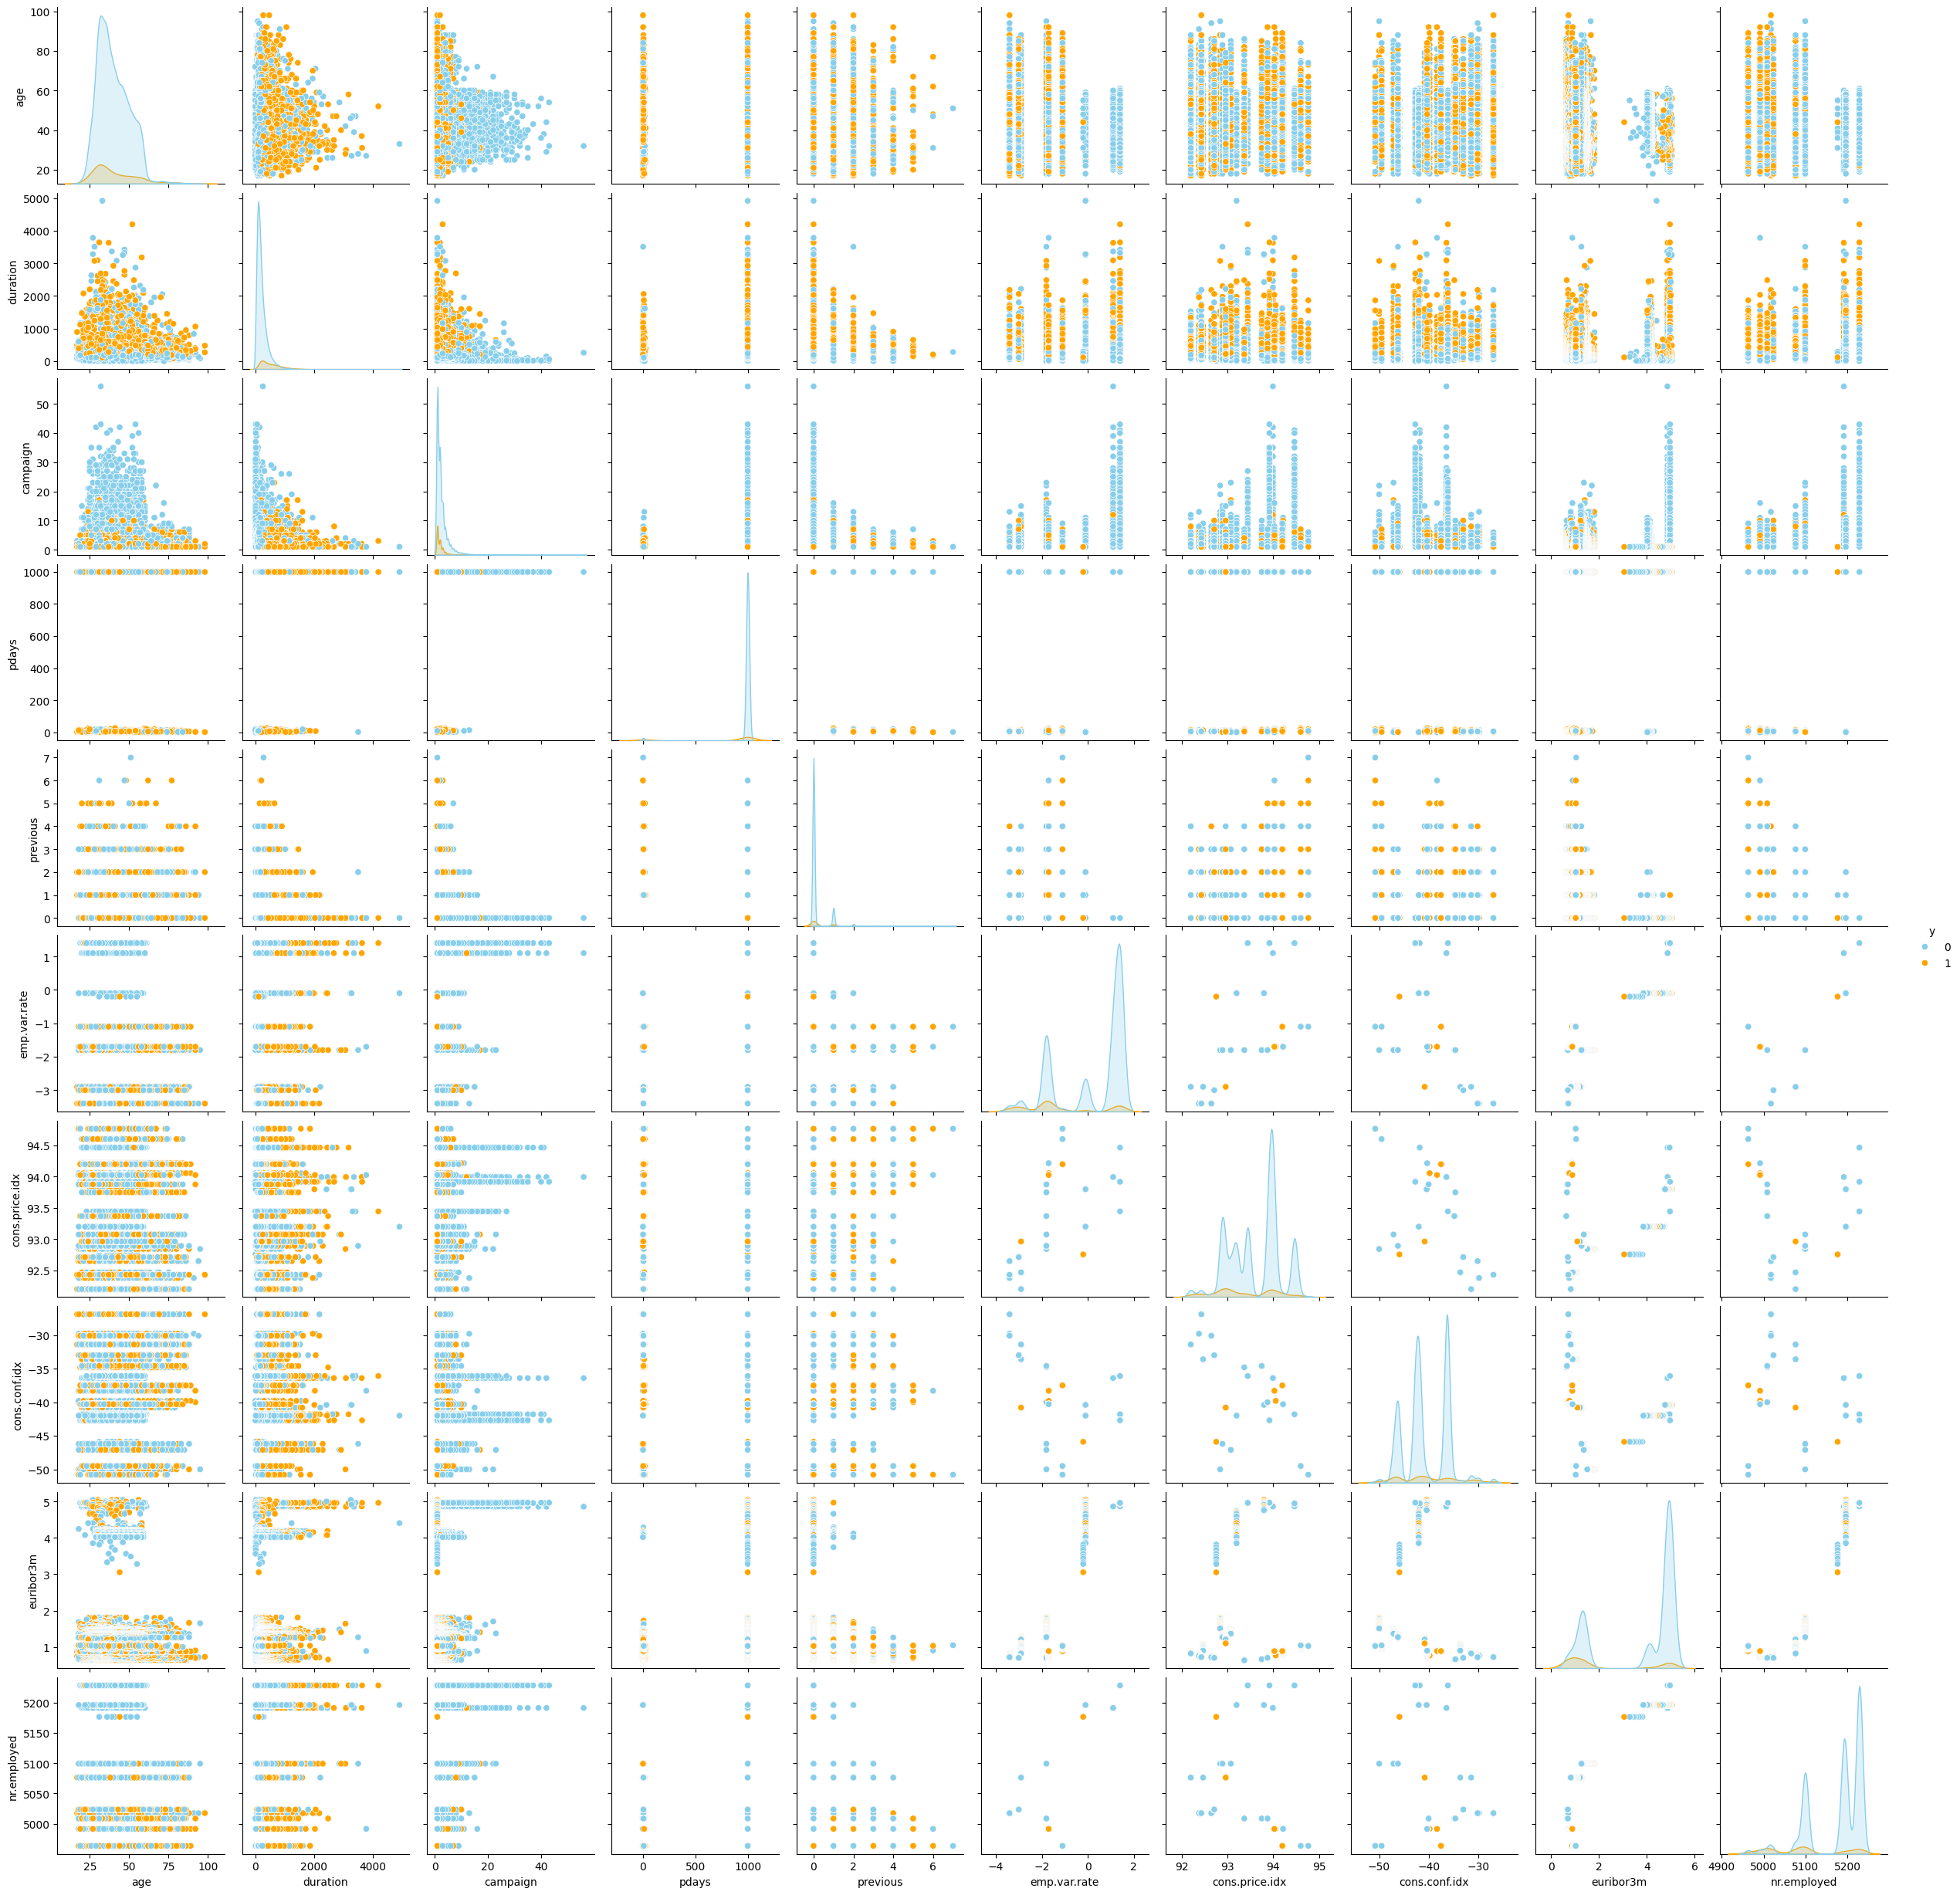

In [ ]:
columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

temp = df[columns + ['y']].copy()
temp['y'] = temp['y'].astype('category')

sns.pairplot(temp, hue='y', palette={0: 'skyblue', 1: 'orange'})
plt.show()


1. Still we see, what was said previously, increasing number of contacts to a customer does not show increase his willing to subscribe a deposit. This is suggested by low location of positively marked dots for fairly all plots with feature "campaign" on y axes.
2. Some dependency is present between features:
"emp.var.rate" and "nr.empoyed";
"cons.price.idx" and "emp.var.rate"
"cons.price.idx" and "cons.conf.idx"
"euribor3m" and "nr.employed"

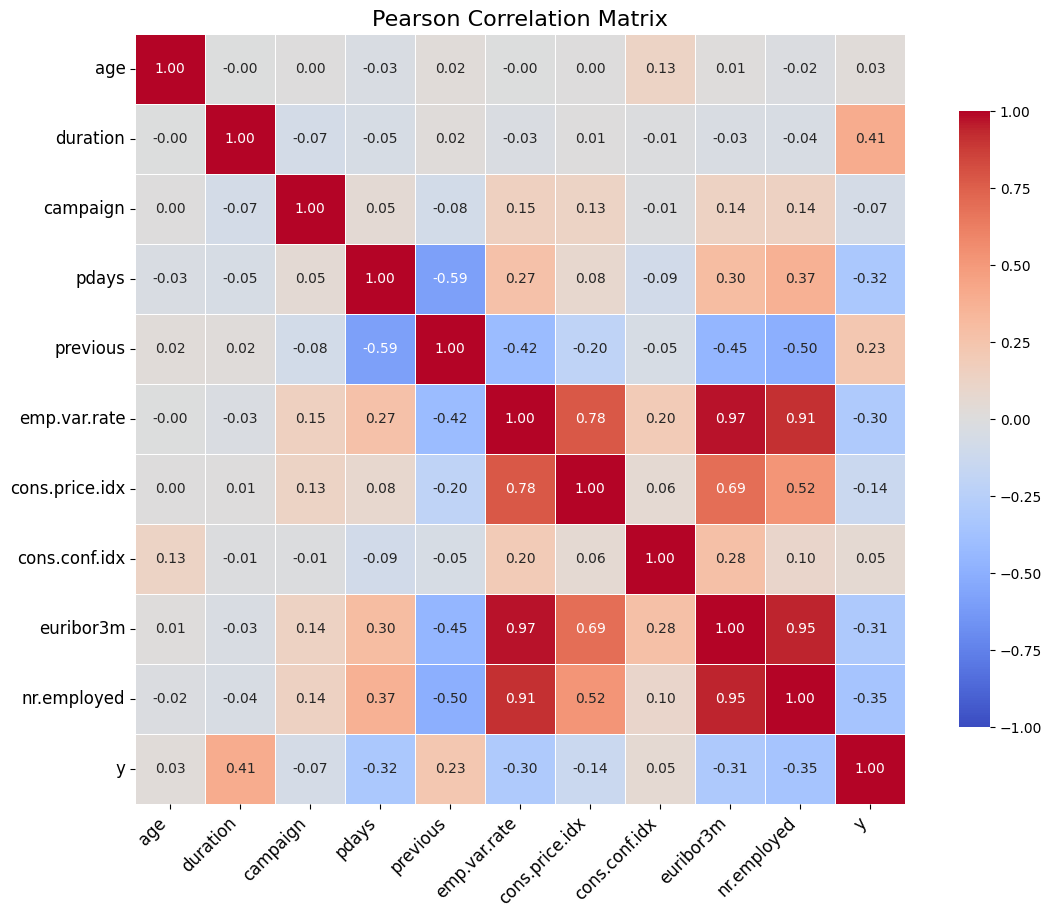

In [ ]:
columns = ['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
numeric_df = df[columns]

plt.figure(figsize=(14, 10))

corr_matrix = numeric_df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10}, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Pearson Correlation Matrix", fontsize=16)
plt.show()

Insights:

1. Strong posiitve correlation is present between features:  "euribor3m" and "emp.var.rate"; "nr.employed" and "emp.var.rate"; "euribor3m" and "nr.employed"

2. Moderate positive correlation is present between features: "emp.var.rate" and "cons.price.idx"; "cons.price.idx" and "euribor3m"; "cons.price.idx" and "nr.employed"

3. Moderate negative correlation is present between features: "previous" and "pdays"; "previous" and "nr.employed"; "euribor3m" and "previous"

4. As was said in description of dataset the feature "duration" has impact on feature "y", though the correlation is not very high betwen these two variables.

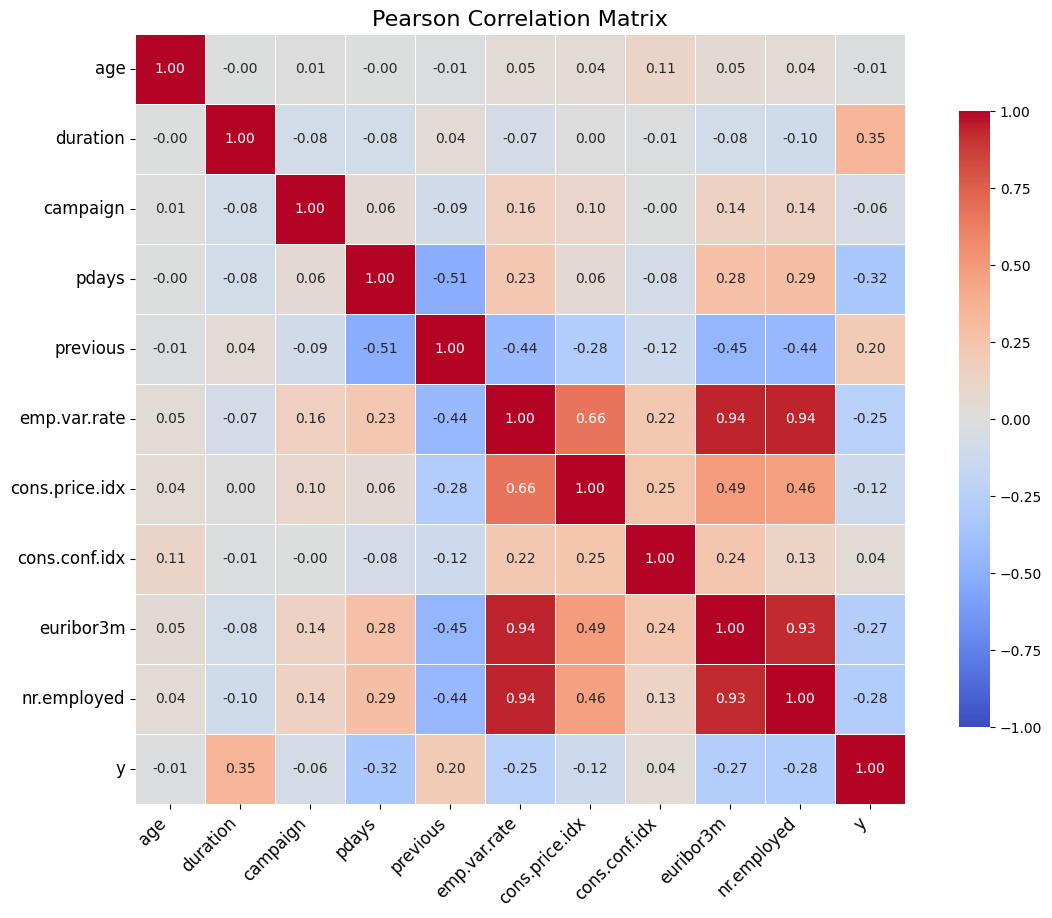

In [ ]:
columns = ['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
numeric_df = df[columns]

plt.figure(figsize=(14, 10))

corr_matrix = numeric_df.corr(method='spearman')

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10}, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Pearson Correlation Matrix", fontsize=16)
plt.show()

Pearson correlation matrix is showing relationship for the same varibales. But values of correlations are generally smaller.
We see correlation not detected previously by Pearson method , between features: "cons.conf.idx" and "cons.price.idx"

In [ ]:
def chi_squared_test(features, df, alpha=0.05):
    prob = 1 - alpha

    results = []

    for i, feature1 in enumerate(features):
        for feature2 in features[i+1:]:
            contingency_table = pd.crosstab(df[feature1], df[feature2])

            stat, p, dof, expected = chi2_contingency(contingency_table)

            critical = chi2.ppf(prob, dof)

            if abs(stat) >= critical:
                dependence_result = 'Dependent (reject H0)'
            else:
                dependence_result = 'Independent (fail to reject H0)'

            if p <= alpha:
                p_value_result = 'Dependent (reject H0)'
            else:
                p_value_result = 'Independent (fail to reject H0)'

            results.append({
                'Feature 1': feature1,
                'Feature 2': feature2,
                'Chi-Square': stat,
                'p-value': p,
                'Degrees of Freedom': dof,
                'Critical Value': critical,
                'Test Statistic Result': dependence_result,
                'P-value Result': p_value_result
            })

    chi2_results_df = pd.DataFrame(results)
    return chi2_results_df

In [ ]:
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week']


chi2_results_categorical = chi_squared_test(categorical_features, df)

print("Categorical Features Chi-Squared Results:")
chi2_results_categorical

Categorical Features Chi-Squared Results:


Feature 1    Feature 2    Chi-Square        p-value  Degrees of Freedom  \
0         job      marital   4005.790987   0.000000e+00                  20   
1         job    education  34176.238697   0.000000e+00                  60   
2         job      contact    642.199354  1.584738e-131                  10   
3         job        month   4519.183658   0.000000e+00                  90   
4         job  day_of_week     73.227362   1.045177e-03                  40   
5     marital    education   1612.776579   0.000000e+00                  12   
6     marital      contact    215.526673   1.581166e-47                   2   
7     marital        month    325.960901   2.146689e-58                  18   
8     marital  day_of_week     20.632976   8.189013e-03                   8   
9   education      contact    532.784286  7.254970e-112                   6   
10  education        month   2354.921359   0.000000e+00                  54   
11  education  day_of_week     74.524726   4.422510e-07                  24   
12    contact        month  15288.827616   0.000000e+00                   9   
13    contact  day_of_week    128.166805   9.602895e-27                   4   
14      month  day_of_week    766.011357  1.111297e-137                  36   

    Critical Value  Test Statistic Result         P-value Result  
0        31.410433  Dependent (reject H0)  Dependent (reject H0)  
1        79.081944  Dependent (reject H0)  Dependent (reject H0)  
2        18.307038  Dependent (reject H0)  Dependent (reject H0)  
3       113.145270  Dependent (reject H0)  Dependent (reject H0)  
4        55.758479  Dependent (reject H0)  Dependent (reject H0)  
5        21.026070  Dependent (reject H0)  Dependent (reject H0)  
6         5.991465  Dependent (reject H0)  Dependent (reject H0)  
7        28.869299  Dependent (reject H0)  Dependent (reject H0)  
8        15.507313  Dependent (reject H0)  Dependent (reject H0)  
9        12.591587  Dependent (reject H0)  Dependent (reject H0)  
10       72.153216  Dependent (reject H0)  Dependent (reject H0)  
11       36.415029  Dependent (reject H0)  Dependent (reject H0)  
12       16.918978  Dependent (reject H0)  Dependent (reject H0)  
13        9.487729  Dependent (reject H0)  Dependent (reject H0)  
14       50.998460  Dependent (reject H0)  Dependent (reject H0)

Chi-Squared test for independence of categorical variables hypothesis suggets us that all categorical features in our dataset are likely to be dependent.

In [ ]:
categorical_features = ['default', 'housing', 'loan', 'poutcome', 'y' ]


chi2_results_categorical = chi_squared_test(categorical_features, df)

print("Binary Features Chi-Squared Results:")
chi2_results_categorical

Binary Features Chi-Squared Results:


Feature 1 Feature 2   Chi-Square       p-value  Degrees of Freedom  \
0   default   housing     0.027764  8.676643e-01                   1   
1   default      loan     0.000000  1.000000e+00                   1   
2   default  poutcome     0.000000  1.000000e+00                   1   
3   default         y     0.000000  1.000000e+00                   1   
4   housing      loan    54.444501  1.599005e-13                   1   
5   housing  poutcome     5.178996  2.286154e-02                   1   
6   housing         y     4.991011  2.547931e-02                   1   
7      loan  poutcome     0.003533  9.526033e-01                   1   
8      loan         y     0.782639  3.763354e-01                   1   
9  poutcome         y  4114.313594  0.000000e+00                   1   

   Critical Value            Test Statistic Result  \
0        3.841459  Independent (fail to reject H0)   
1        3.841459  Independent (fail to reject H0)   
2        3.841459  Independent (fail to reject H0)   
3        3.841459  Independent (fail to reject H0)   
4        3.841459            Dependent (reject H0)   
5        3.841459            Dependent (reject H0)   
6        3.841459            Dependent (reject H0)   
7        3.841459  Independent (fail to reject H0)   
8        3.841459  Independent (fail to reject H0)   
9        3.841459            Dependent (reject H0)   

                    P-value Result  
0  Independent (fail to reject H0)  
1  Independent (fail to reject H0)  
2  Independent (fail to reject H0)  
3  Independent (fail to reject H0)  
4            Dependent (reject H0)  
5            Dependent (reject H0)  
6            Dependent (reject H0)  
7  Independent (fail to reject H0)  
8  Independent (fail to reject H0)  
9            Dependent (reject H0)

Chi-Squared test for independence of categorical variables hypothesis suggets us that there is a statistically significant dependency between features: "housing" and "loan", "housing" and "potcome"; "housing" and "y"; "poutcome" and "y".

**Anomalies, outliers**

 Let's see what values could be considere as outliers for features: "age", "duration", "campaign". As we have seen distributions of these features are right skewed, so in this case it is appropriate to use Double MAD method for finding outliers.

In [ ]:
def double_mad(x, zero_mad_action="warn"):
    x = np.array(x)
    median = np.median(x)
    abs_dev = np.abs(x - median)

    left_mad = np.median(abs_dev[x <= median])
    right_mad = np.median(abs_dev[x >= median])

    if left_mad == 0 or right_mad == 0:
        if zero_mad_action == "stop":
            raise ValueError("MAD is 0")
        elif zero_mad_action == "warn":
            print("Warning: MAD is 0")
        elif zero_mad_action == "na":
            left_mad = None if left_mad == 0 else left_mad
            right_mad = None if right_mad == 0 else right_mad

    return left_mad, right_mad

def double_mads_from_median(x, threshold=3, zero_mad_action="warn"):
    left_mad, right_mad = double_mad(x, zero_mad_action=zero_mad_action)
    median = np.median(x)

    mad_distances = np.zeros(len(x))
    for i, value in enumerate(x):
        if value < median:
            mad_distances[i] = np.abs(value - median) / left_mad if left_mad else 0
        else:
            mad_distances[i] = np.abs(value - median) / right_mad if right_mad else 0

    return mad_distances > threshold

def plot_double_mad_outliers(df, feature, threshold=3):
    x = df[feature]
    outliers = double_mads_from_median(x, threshold=threshold)

    plt.figure(figsize=(10, 6))
    sns.histplot(x, bins=30, color='skyblue', edgecolor='black')
    plt.scatter(x[outliers], [0] * sum(outliers), color='red', label='Outliers')

    median = np.median(x)
    left_mad, right_mad = double_mad(x)
    lower_bound = median - threshold * left_mad
    upper_bound = median + threshold * right_mad
    plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Outliers start at: {lower_bound:.2f}')
    plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Outliers start at: {upper_bound:.2f}')

    plt.title(f'Histogram of {feature} with Double MAD Outlier Detection')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

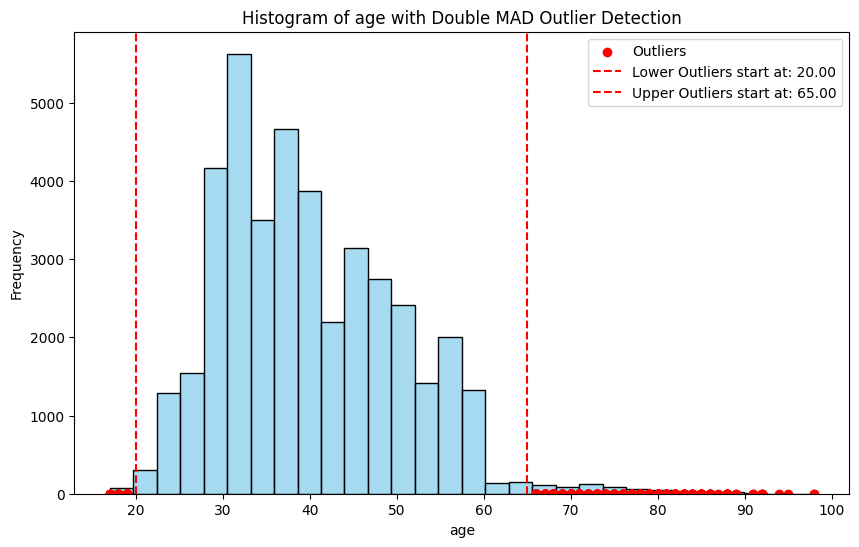

In [ ]:
plot_double_mad_outliers(df, 'age')

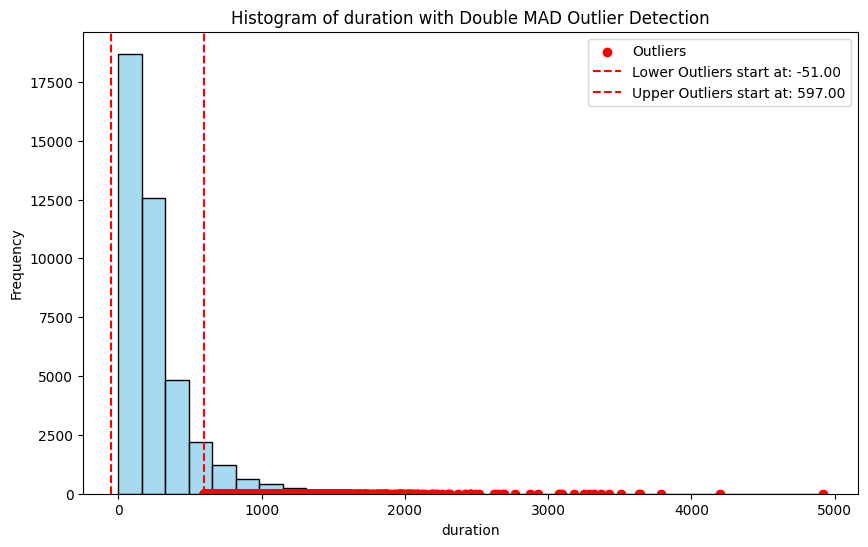

In [ ]:
plot_double_mad_outliers(df, 'duration')


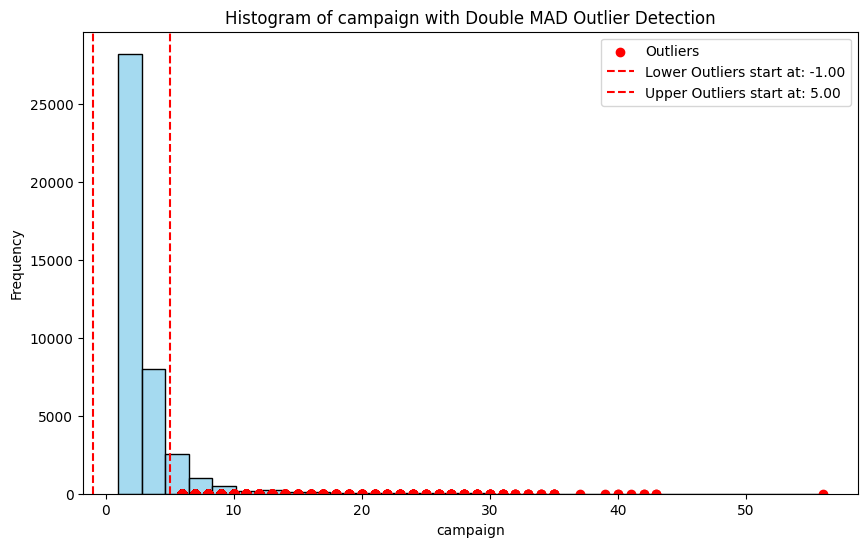

In [ ]:
plot_double_mad_outliers(df, 'campaign')

As we see for distribution "age" the double mad classified small and high outliers. For features "campaign" and "duration" it classified small outliers with starting point that falls out of their value range. It is due to the fact that these features are extremely right skewed and there are not any outliers of small value for them.

**Data preparation**

For features that were representing two states, like: {"yes", "no"} or {"success", "failure"}, preperatation step was already done. Their values were replaced accordingly to values {1, 0}. These binary features are: default, housing, loan, poutcome, y.

For categorical features: job, marital, education, contact, month, day_of_week will be done encoding. Will be used one-hot encoding for features: job, marital, contact, month, day_of_week. Because it is not possible to introudce order for values of these features. And for variable: education it is possible to introduce order , so for this variable will be implemented ordinal encoding.

For all other numerical features: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed will be performed standarization. Only one problem is present. The feature pdays takes on some times critical value: 999, which means that client was not previously contacted. I will divide this feature on two separate features. First feature will denote whether client was previously contacted (value "1" if duration != 999 and 0 otherwise) and the second one will be the same pdays but with "Nan" replacing old "999" values. After that we can standartize feature pdays.

In [ ]:
binary_features = ['default', 'housing', 'loan', 'poutcome', 'y']
categorical_features = ['job', 'marital', 'contact', 'month', 'day_of_week']
ordinal_feature = ['education']
numeric_features = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
                    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

binary_transformer = 'passthrough'

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_transformer = OrdinalEncoder(categories=[['illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
                                                  'high.school', 'professional.course', 'university.degree']])

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('categorical', categorical_transformer, categorical_features),
        ('ordinal', ordinal_transformer, ordinal_feature),
        ('numeric', numeric_transformer, numeric_features)
    ],
    remainder='drop'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

processed_data = pipeline.fit_transform(df)

binary_feature_names = binary_features
categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
ordinal_feature_names = ordinal_feature
numeric_feature_names = numeric_features
all_feature_names = np.concatenate([
    binary_feature_names,
    categorical_feature_names,
    ordinal_feature_names,
    numeric_feature_names,
])

processed_df = pd.DataFrame(processed_data, columns=all_feature_names)
processed_df.insert(0, "pdays", df['pdays'])

In [ ]:
processed_df['pcontacted'] = processed_df['pdays'].apply(lambda x: 0 if x == 999 else 1)
processed_df['pdays'] = processed_df['pdays'].replace(999, np.nan)
scaler = StandardScaler()
processed_df['pdays'] = scaler.fit_transform(processed_df[['pdays']])

In [ ]:
processed_df.describe().T

count          mean       std       min       25%  \
pdays               1515.0 -9.849107e-17  1.000330 -1.572982 -0.788390   
default            41188.0  7.283675e-05  0.008534  0.000000  0.000000   
housing            41188.0  5.478780e-01  0.497708  0.000000  0.000000   
loan               41188.0  1.516947e-01  0.358729  0.000000  0.000000   
poutcome           41188.0  3.333495e-02  0.179512  0.000000  0.000000   
y                  41188.0  1.126542e-01  0.316173  0.000000  0.000000   
job_admin.         41188.0  2.610469e-01  0.439211  0.000000  0.000000   
job_blue-collar    41188.0  2.246771e-01  0.417375  0.000000  0.000000   
job_entrepreneur   41188.0  3.535010e-02  0.184665  0.000000  0.000000   
job_housemaid      41188.0  2.573565e-02  0.158348  0.000000  0.000000   
job_management     41188.0  7.099155e-02  0.256814  0.000000  0.000000   
job_retired        41188.0  4.175974e-02  0.200042  0.000000  0.000000   
job_self-employed  41188.0  3.450034e-02  0.182513  0.000000  0.000000   
job_services       41188.0  9.636302e-02  0.295092  0.000000  0.000000   
job_student        41188.0  2.124405e-02  0.144199  0.000000  0.000000   
job_technician     41188.0  1.637127e-01  0.370019  0.000000  0.000000   
job_unemployed     41188.0  2.461882e-02  0.154962  0.000000  0.000000   
marital_divorced   41188.0  1.119744e-01  0.315339  0.000000  0.000000   
marital_married    41188.0  6.071671e-01  0.488386  0.000000  0.000000   
marital_single     41188.0  2.808585e-01  0.449424  0.000000  0.000000   
contact_cellular   41188.0  6.347480e-01  0.481507  0.000000  0.000000   
contact_telephone  41188.0  3.652520e-01  0.481507  0.000000  0.000000   
month_apr          41188.0  6.390211e-02  0.244581  0.000000  0.000000   
month_aug          41188.0  1.499951e-01  0.357071  0.000000  0.000000   
month_dec          41188.0  4.418763e-03  0.066328  0.000000  0.000000   
month_jul          41188.0  1.741769e-01  0.379266  0.000000  0.000000   
month_jun          41188.0  1.291153e-01  0.335332  0.000000  0.000000   
month_mar          41188.0  1.325629e-02  0.114372  0.000000  0.000000   
month_may          41188.0  3.342964e-01  0.471750  0.000000  0.000000   
month_nov          41188.0  9.956784e-02  0.299427  0.000000  0.000000   
month_oct          41188.0  1.743226e-02  0.130877  0.000000  0.000000   
month_sep          41188.0  1.383898e-02  0.116824  0.000000  0.000000   
day_of_week_fri    41188.0  1.900311e-01  0.392330  0.000000  0.000000   
day_of_week_mon    41188.0  2.067107e-01  0.404951  0.000000  0.000000   
day_of_week_thu    41188.0  2.093571e-01  0.406855  0.000000  0.000000   
day_of_week_tue    41188.0  1.964164e-01  0.397292  0.000000  0.000000   
day_of_week_wed    41188.0  1.974847e-01  0.398106  0.000000  0.000000   
education          41188.0  4.238225e+00  1.645985  0.000000  3.000000   
age                41188.0 -1.880382e-16  1.000012 -2.209365 -0.769980   
duration           41188.0 -1.397348e-17  1.000012 -0.996177 -0.602774   
campaign           41188.0 -7.590531e-17  1.000012 -0.565922 -0.565922   
previous           41188.0  5.520386e-18  1.000012 -0.349494 -0.349494   
emp.var.rate       41188.0  7.797546e-17  1.000012 -2.216433 -1.197935   
cons.price.idx     41188.0 -3.315820e-14  1.000012 -2.374889 -0.864955   
cons.conf.idx      41188.0 -1.352495e-16  1.000012 -2.224953 -0.474791   
euribor3m          41188.0  0.000000e+00  1.000012 -1.722351 -1.312994   
nr.employed        41188.0 -1.024860e-14  1.000012 -2.815697 -0.940281   
pcontacted         41188.0  3.678256e-02  0.188230  0.000000  0.000000   

                        50%       75%        max  
pdays             -0.003798  0.257733   5.488346  
default            0.000000  0.000000   1.000000  
housing            1.000000  1.000000   1.000000  
loan               0.000000  0.000000   1.000000  
poutcome           0.000000  0.000000   1.000000  
y                  0.000000  0.000000   1.000000  
job_admin.         0.000000  1.000000

**Dimesionality reduction**

We will not use feature "pdays" during dimesionality reduction, as this variable is in general cosists of Null values. Of course we will not use for dimensionality reduction of feature space target variable y, as it is does not belong this feature space.
We will try to retain for 95% of explained variance.

**PCA**



Optimal number of components for 95% explained variance: 21


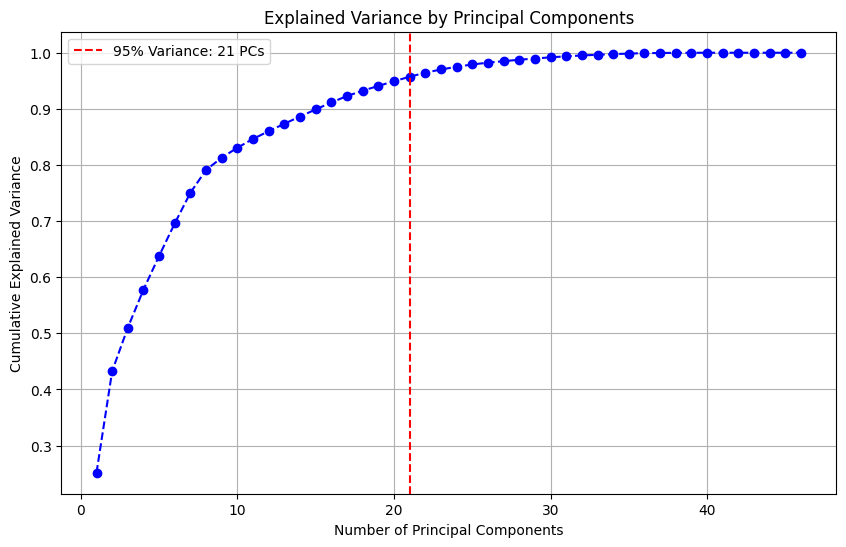

In [ ]:
data_for_pca = processed_df.drop(columns=['y', 'pdays'])

pca = PCA()
pca_results = pca.fit_transform(data_for_pca)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

optimal_components = (cumulative_variance >= 0.95).argmax() + 1
print(f"Optimal number of components for 95% explained variance: {optimal_components}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axvline(optimal_components, color='r', linestyle='--', label=f'95% Variance: {optimal_components} PCs')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()

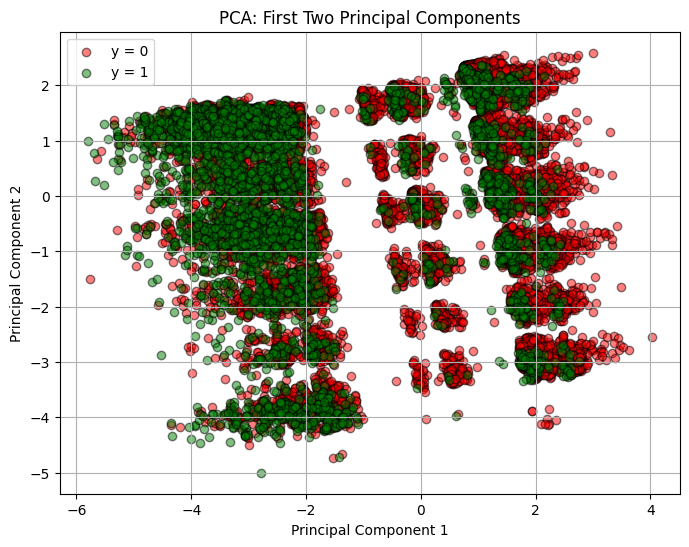

In [ ]:
pca_optimal = PCA(n_components=optimal_components)
pca_results_optimal = pca_optimal.fit_transform(processed_df.drop(columns=['y', 'pdays']))

pca_df = pd.DataFrame(data=pca_results_optimal, columns=[f'PC{i+1}' for i in range(optimal_components)])
pca_df['y'] = processed_df['y']

plt.figure(figsize=(8, 6))
for label, color in zip([0, 1], ['red', 'green']):
    subset = pca_df[pca_df['y'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'y = {label}', alpha=0.5, edgecolor='k', color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.legend()
plt.grid()
plt.show()

**SVD**

Optimal number of components for 95% explained variance: 21


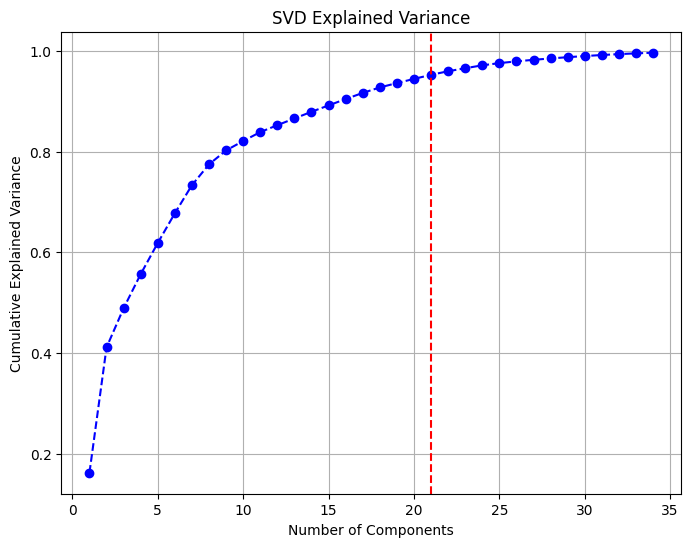

In [ ]:
data_for_svd = processed_df.drop(columns=['y', 'pdays'])

svd = TruncatedSVD(n_components=34, random_state=42)
svd_results = svd.fit_transform(data_for_svd)

explained_variance = svd.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()


optimal_components = (cumulative_variance >= 0.95).argmax() + 1
print(f"Optimal number of components for 95% explained variance: {optimal_components}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axvline(optimal_components, color='r', linestyle='--', label=f'95% Variance: {optimal_components}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('SVD Explained Variance')
plt.grid()
plt.show()

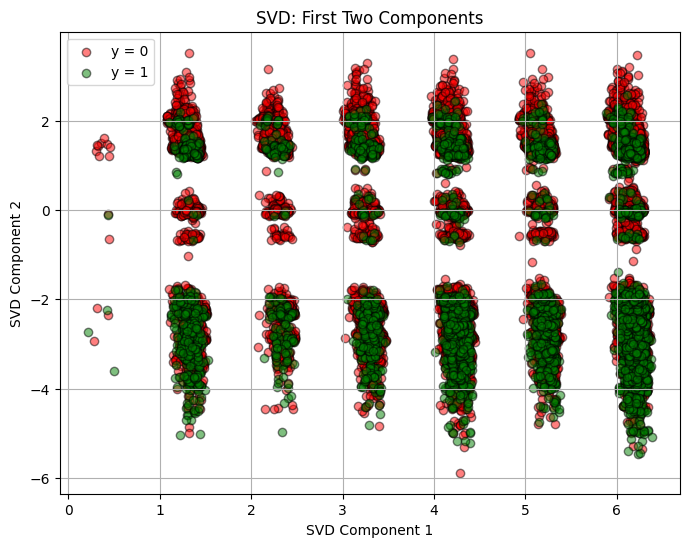

In [ ]:
svd_optimal = TruncatedSVD(n_components=optimal_components, random_state=42)
svd_results_optimal = svd_optimal.fit_transform(data_for_svd)

svd_df = pd.DataFrame(data=svd_results_optimal, columns=[f'Component{i+1}' for i in range(optimal_components)])
svd_df['y'] = processed_df['y']

plt.figure(figsize=(8, 6))
for label, color in zip([0, 1], ['red', 'green']):
    subset = svd_df[svd_df['y'] == label]
    plt.scatter(subset['Component1'], subset['Component2'], label=f'y = {label}', alpha=0.5, edgecolor='k', color=color)

plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD: First Two Components')
plt.legend()
plt.grid()
plt.show()


We can see that structures of projections of our dataset onto 2 dimensions look similiar for SVD and PCA. Number of components for 95% explained variance is the same (with 21 components for SVD and 21 components for PCA).
Already in two dimensions we can notice that our dataset can be divided into 2 parts, but that probably would be much easier to notice in three dimensions. So , firstly we see that instances that have value for target variable equal to 1 are located in lower part of plot. Also we see that at the backround are located instances with y equal to 0 and in the foreground are located instances that have y equal to 1.

**t-SNE**

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

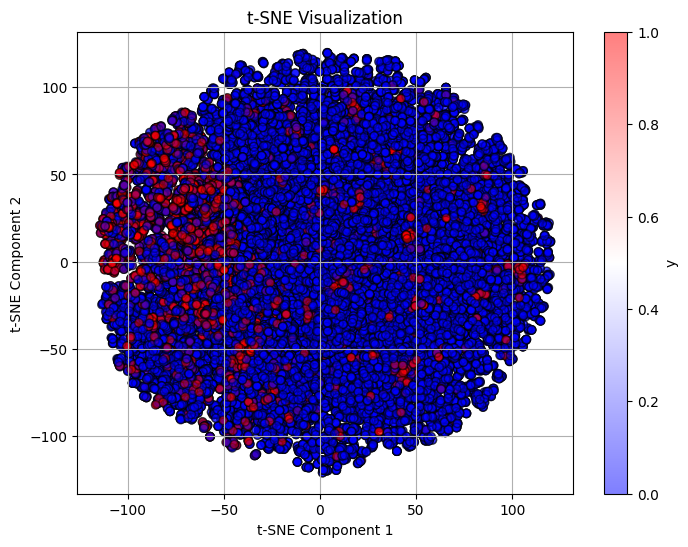

In [ ]:
data_for_tsne = processed_df.drop(columns=['y', 'pdays'])

tsne = TSNE(n_components=2, perplexity=5)
tsne_results = tsne.fit_transform(data_for_tsne)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    alpha=0.5,
    c=processed_df['y'],
    cmap='bwr',
    edgecolor='k'
)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar(scatter, label='y')
plt.grid()
plt.show()


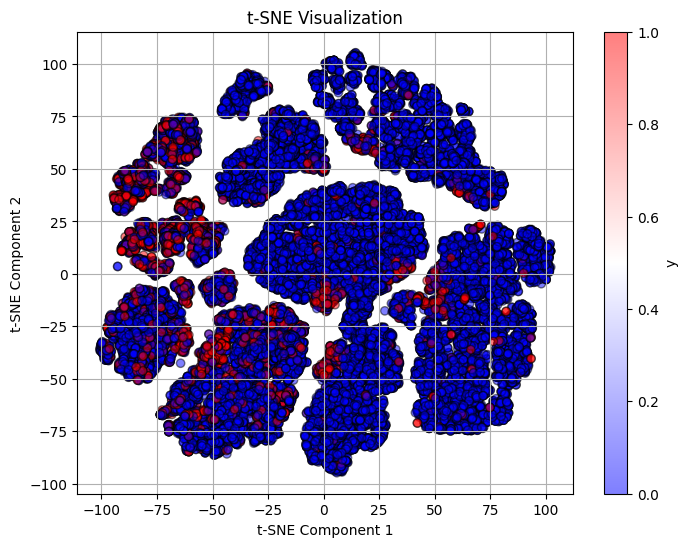

In [ ]:
data_for_tsne = processed_df.drop(columns=['y', 'pdays'])

tsne = TSNE(n_components=2, perplexity=50)
tsne_results = tsne.fit_transform(data_for_tsne)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    alpha=0.5,
    c=processed_df['y'],
    cmap='bwr',
    edgecolor='k'
)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar(scatter, label='y')
plt.grid()
plt.show()

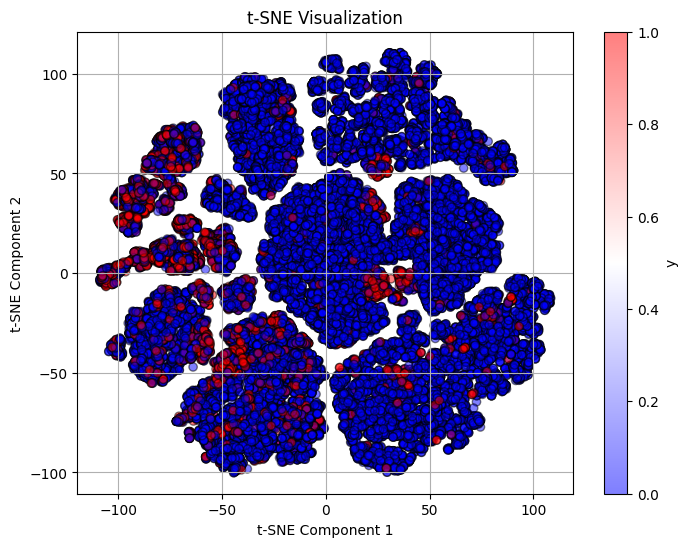

In [ ]:
data_for_tsne = processed_df.drop(columns=['y', 'pdays'])

tsne = TSNE(n_components=2, perplexity=35)
tsne_results = tsne.fit_transform(data_for_tsne)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    alpha=0.5,
    c=processed_df['y'],
    cmap='bwr',
    edgecolor='k'
)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE')
plt.colorbar(scatter, label='y')
plt.grid()
plt.show()

t-SNE shows us that our data has big clusters of samples with feature y equal to 0 and few smaller sub-clusters of samples with feature y equal to 1.

**Conclusion of the report**  
In this report were investigated feature dependencies, their distributions. Was also done filling missing values of dataframe, discovering anomalies, data preparing, visualizing data in low dimensions.   
We have seen that there is logical connection between features, there are some positive and negative correlations. We have seen some useful relations and tendencies. Such insights can help us while next builiding a model.   
Also we have seen that some features in dataset are not very helpful. For example, feature pdays is generaly showing that almost all clients were not previously contacted. Such feature needs special handling as contains contradictory values. We have seen that outliers might be important as they correlate with output feature y. Also, we noticed some features full of missing data that also need some special handling.